Parcial Final Machine learning parte 2 presentado por: Cristian Colpas

## Punto modelo de clasificacion de fraude

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report


IMPORTACION DE ALGUNAS LIBRERIAS

In [4]:
fraudiden= pd.read_csv('C:/Users/crist/OneDrive/Escritorio/parcialmachinelearning/data fraud/train_identity.csv')
fraudtran= pd.read_csv('C:/Users/crist/OneDrive/Escritorio/parcialmachinelearning/data fraud/train_transaction.csv')

En esta parte se realiza la lectura de los dos dataframe de entrenamiento, train identity y train transaction

In [5]:
fraudiden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [6]:
fraudtran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
print(fraudiden.columns.values)

['TransactionID' 'id_01' 'id_02' 'id_03' 'id_04' 'id_05' 'id_06' 'id_07'
 'id_08' 'id_09' 'id_10' 'id_11' 'id_12' 'id_13' 'id_14' 'id_15' 'id_16'
 'id_17' 'id_18' 'id_19' 'id_20' 'id_21' 'id_22' 'id_23' 'id_24' 'id_25'
 'id_26' 'id_27' 'id_28' 'id_29' 'id_30' 'id_31' 'id_32' 'id_33' 'id_34'
 'id_35' 'id_36' 'id_37' 'id_38' 'DeviceType' 'DeviceInfo']


In [8]:
print(fraudtran.columns.values)

['TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'ProductCD'
 'card1' 'card2' 'card3' 'card4' 'card5' 'card6' 'addr1' 'addr2' 'dist1'
 'dist2' 'P_emaildomain' 'R_emaildomain' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6'
 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5'
 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'M1' 'M2' 'M3'
 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8'
 'V9' 'V10' 'V11' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20'
 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32'
 'V33' 'V34' 'V35' 'V36' 'V37' 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44'
 'V45' 'V46' 'V47' 'V48' 'V49' 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56'
 'V57' 'V58' 'V59' 'V60' 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68'
 'V69' 'V70' 'V71' 'V72' 'V73' 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80'
 'V81' 'V82' 'V83' 'V84' 'V85' 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92'
 'V93' 'V94' 'V95' 'V96' 'V97' 'V98' 'V99' 'V100' 'V101' 'V1

lectura de las columnas de los dos dataframe, en el caso del dataframe fraud transaction se puede ver columnas que las columnas "vxx" llegan hasta las 339, siendo una cantidad considerable

In [9]:
fraudmer=pd.merge(fraudtran, fraudiden, on='TransactionID', how='left')

se realiza el merge para unir los dos dataframe

In [10]:
print(fraudmer.columns.values)

['TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'ProductCD'
 'card1' 'card2' 'card3' 'card4' 'card5' 'card6' 'addr1' 'addr2' 'dist1'
 'dist2' 'P_emaildomain' 'R_emaildomain' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6'
 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5'
 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'M1' 'M2' 'M3'
 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8'
 'V9' 'V10' 'V11' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20'
 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32'
 'V33' 'V34' 'V35' 'V36' 'V37' 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44'
 'V45' 'V46' 'V47' 'V48' 'V49' 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56'
 'V57' 'V58' 'V59' 'V60' 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68'
 'V69' 'V70' 'V71' 'V72' 'V73' 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80'
 'V81' 'V82' 'V83' 'V84' 'V85' 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92'
 'V93' 'V94' 'V95' 'V96' 'V97' 'V98' 'V99' 'V100' 'V101' 'V1

se puede ver la union de ambos datset

In [11]:
fraudmer

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


se puede notar que tenemos en el nuevo dataframe unido 434 columnas y 590540 datos

Se puede notar que existen datos vacios, por lo cual seria interesante ver la cantidad de datos vacios que tiene en total el dataset unido

In [12]:
faltante=fraudmer.isnull().sum()
faltante

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

en el dataset existen 210 variables numericas, 4 que son enteras y 13 que son de tipo texto

In [13]:
fraudmer.nunique()

TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt     20902
ProductCD              5
                   ...  
id_36                  2
id_37                  2
id_38                  2
DeviceType             2
DeviceInfo          1786
Length: 434, dtype: int64

Ahora abajo se realizara un analisis grafico de los datos

Text(0, 0.5, 'Probability')

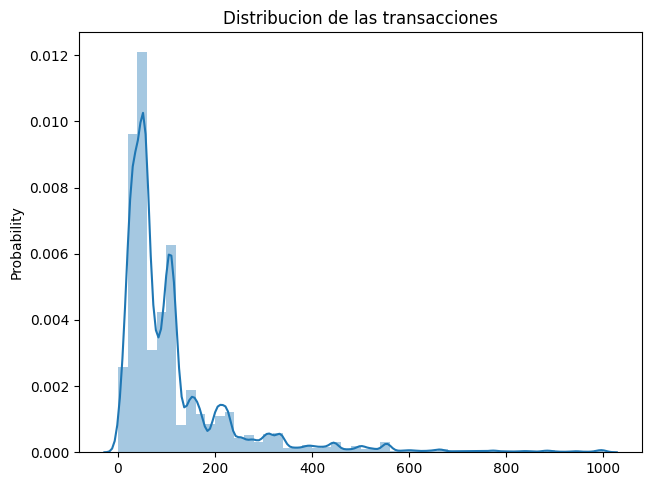

In [14]:
plt.figure(figsize=(16,12))
plt.subplot(221)
g = sns.distplot(fraudmer[fraudmer['TransactionAmt']<= 1000]['TransactionAmt'])
g.set_title("Distribucion de las transacciones")
g.set_xlabel("")
g.set_ylabel("Probability")

se puede notar que se tiene se tiene una tendencia de distribucion a la izquierda, donde la mayoria de compras se encuentran entre un rango de 0 a 200 dolares

In [15]:
fraudmer.isFraud.value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [16]:
fraudmer.isFraud.describe().T

count    590540.000000
mean          0.034990
std           0.183755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64

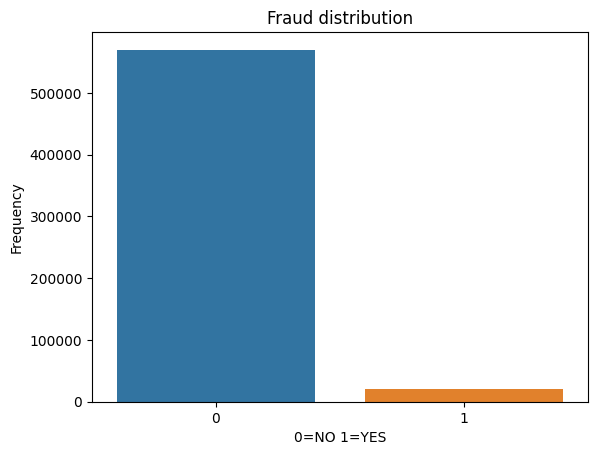

In [17]:
plt.title('Fraud distribution')
sns.countplot(x=fraudmer.isFraud)
plt.xlabel('0=NO 1=YES')
plt.ylabel('Frequency')
plt.show()

se puede notar que existe un gran desbalance de datos, donde en menos del 10% de datos se detecto que se cometio fraude, siendo indicado por 1

In [18]:
fraudmer.ProductCD.value_counts()

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

In [19]:
fraudmer.ProductCD.describe()

count     590540
unique         5
top            W
freq      439670
Name: ProductCD, dtype: object

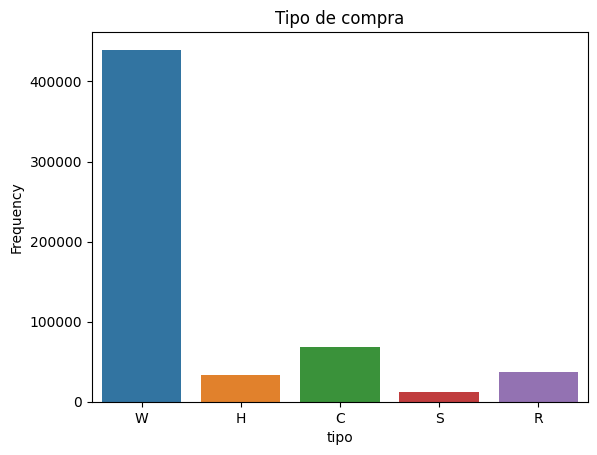

In [20]:
plt.title('Tipo de compra')
sns.countplot(x=fraudmer.ProductCD)
plt.xlabel('tipo')
plt.ylabel('Frequency')
plt.show()

En este caso, el tipo de compra mas realizada fue el de tipo w

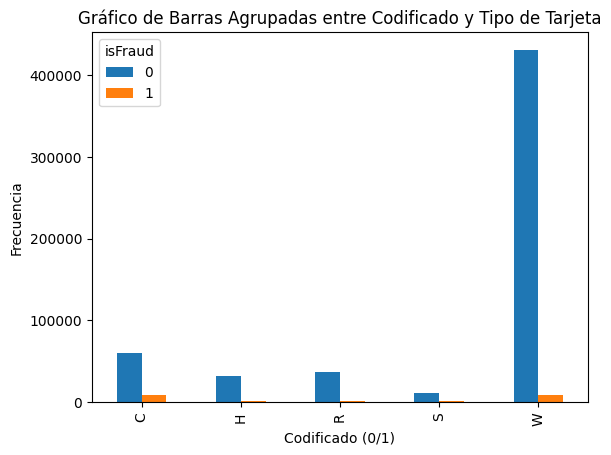

In [21]:
CD = pd.crosstab(fraudmer['ProductCD'], fraudmer['isFraud'])
CD.plot(kind='bar', stacked=False)
#etiquetas
plt.xlabel('Codificado (0/1)')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupadas entre Codificado y Tipo de Tarjeta')

plt.show()

en este analisis cruzado es curioso notar que el producto de tipo "C" a pesar de ser mucho menos menos que el producto "w", tuvieron una cantidad parecida de posibilidad de fraude

Ahora entraremos en la informacion que se tiene segun el tipo que contienen las variables de card, que van del 1 al 6

CARD1


In [22]:
fraudmer.card1.value_counts()

card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
17084        1
14620        1
11440        1
13231        1
18038        1
Name: count, Length: 13553, dtype: int64

In [23]:
fraudmer.card1.describe()

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

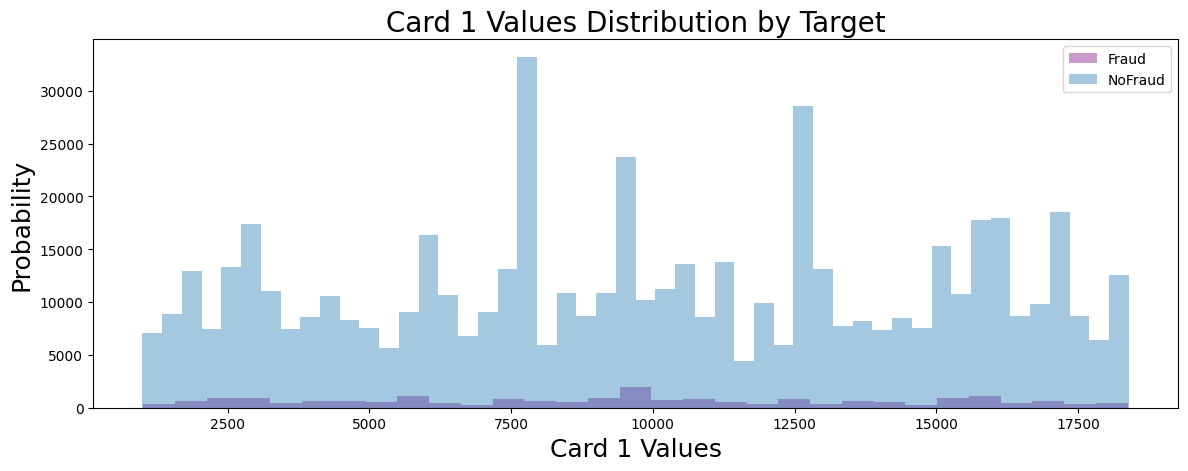

In [24]:
plt.figure(figsize=(14, 22))
plt.subplot(413)
g = sns.distplot(fraudmer[fraudmer['isFraud'] == 1]['card1'], color='purple', kde=False,label='Fraud')
g = sns.distplot(fraudmer[fraudmer['isFraud'] == 0]['card1'], kde=False,label='NoFraud')
g.legend()
g.set_title("Card 1 Values Distribution by Target", fontsize=20)
g.set_xlabel("Card 1 Values", fontsize=18)
g.set_ylabel("Probability", fontsize=18)
plt.show()

se puede observar que el mayor marge de fraude se encuentra en el valor 10000 de la informacion que hace parte de card 1

CARD2

In [25]:
fraudmer.card2.value_counts()

card2
321.0    48935
111.0    45191
555.0    41995
490.0    38145
583.0    21803
         ...  
388.0       39
153.0       38
557.0       37
473.0       18
582.0       14
Name: count, Length: 500, dtype: int64

In [26]:
fraudmer.card2.describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

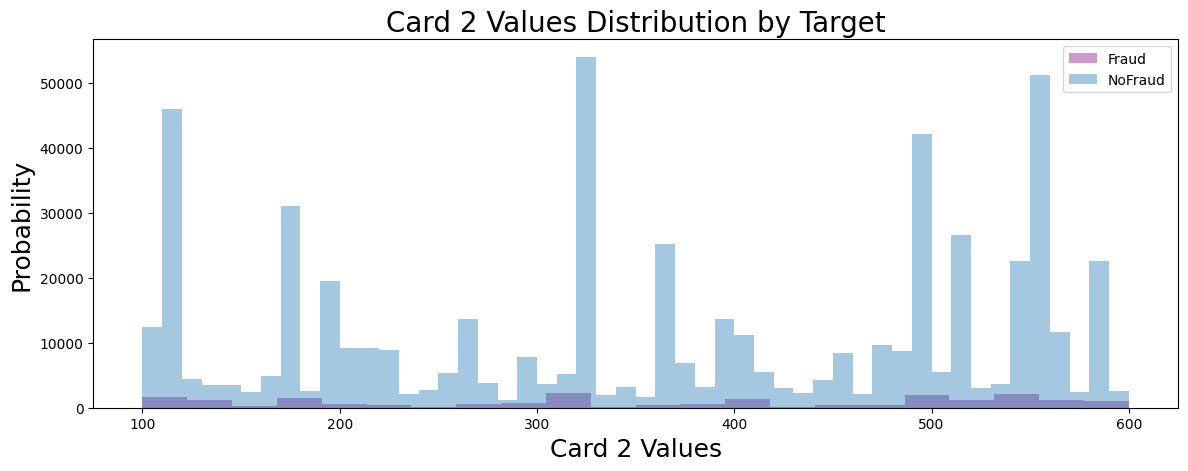

In [27]:
plt.figure(figsize=(14, 22))
plt.subplot(413)
g2 = sns.distplot(fraudmer[fraudmer['isFraud'] == 1]['card2'], color='purple', kde=False,label='Fraud')
g2 = sns.distplot(fraudmer[fraudmer['isFraud'] == 0]['card2'], kde=False,label='NoFraud')
g2.legend()
g2.set_title("Card 2 Values Distribution by Target", fontsize=20)
g2.set_xlabel("Card 2 Values", fontsize=18)
g2.set_ylabel("Probability", fontsize=18)
plt.show()

CARD3

In [28]:
fraudmer.card3.value_counts()

card3
150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
224.0         1
199.0         1
221.0         1
209.0         1
173.0         1
Name: count, Length: 114, dtype: int64

In [29]:
fraudmer.card3.describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

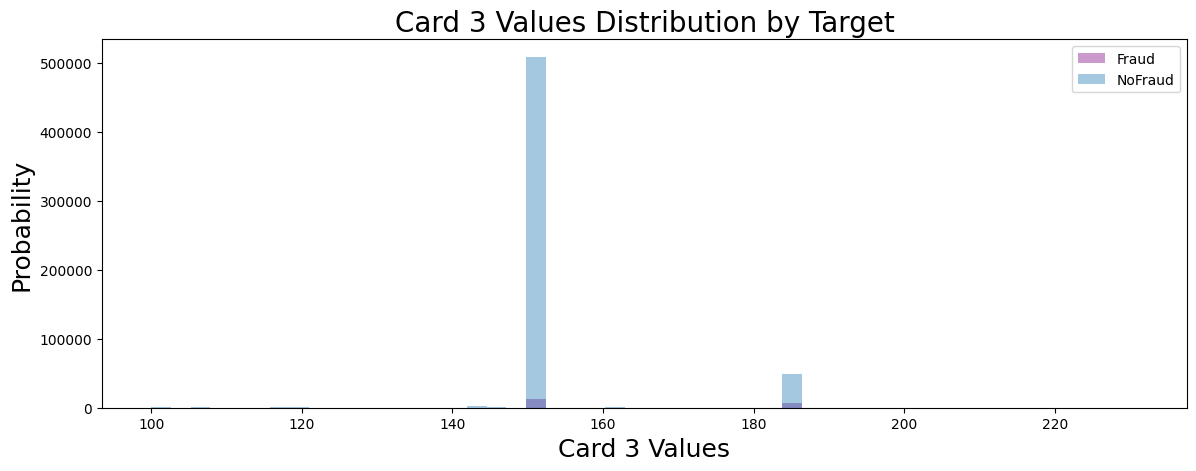

In [30]:
plt.figure(figsize=(14, 22))
plt.subplot(413)
g3 = sns.distplot(fraudmer[fraudmer['isFraud'] == 1]['card3'], color='purple', kde=False,label='Fraud')
g3 = sns.distplot(fraudmer[fraudmer['isFraud'] == 0]['card3'], kde=False,label='NoFraud')
g3.legend()
g3.set_title("Card 3 Values Distribution by Target", fontsize=20)
g3.set_xlabel("Card 3 Values", fontsize=18)
g3.set_ylabel("Probability", fontsize=18)
plt.show()

Aqui la informacion perteneciente a card3 es muy segada, en valuecounts.() y describe.() se puede notar que existen valores  entre 100 y 231, pero segun se muestra en la grafica, la mayor cantidad de datos se encuentran solamente en dos valores

CARD4

In [31]:
fraudmer.card4.value_counts()

card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64

In [32]:
fraudmer.card4.describe()

count     588963
unique         4
top         visa
freq      384767
Name: card4, dtype: object

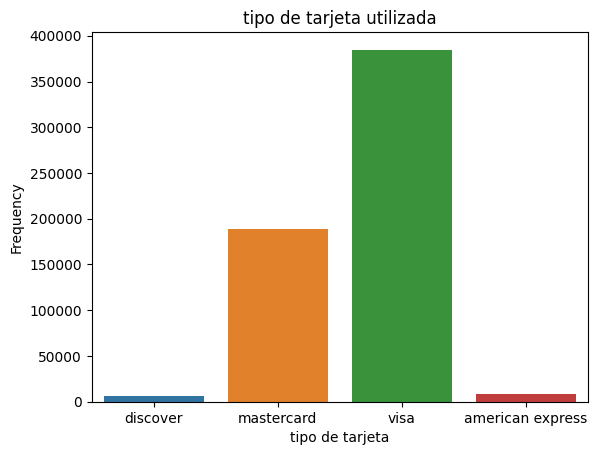

In [33]:
plt.title('tipo de tarjeta utilizada')
sns.countplot(x=fraudmer.card4)
plt.xlabel('tipo de tarjeta')
plt.ylabel('Frequency')
plt.show()

en el caso de la tarjeta, la mas utilizada fue de tipo visa

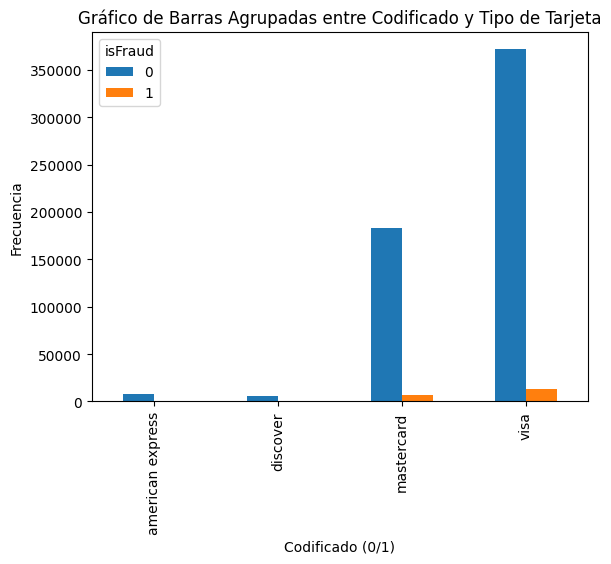

In [34]:
plot4 = pd.crosstab(fraudmer['card4'], fraudmer['isFraud'])

plot4.plot(kind='bar', stacked=False)

#etiquetas
plt.xlabel('Codificado (0/1)')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupadas entre Codificado y Tipo de Tarjeta')

plt.show()

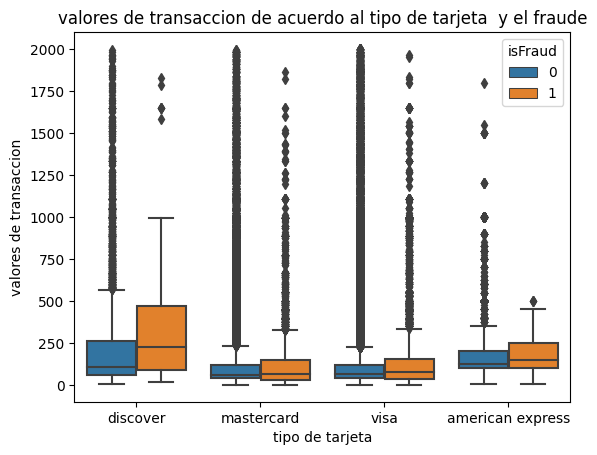

In [35]:
sns.boxplot(x="card4", y="TransactionAmt",hue='isFraud',data=fraudmer[fraudmer['TransactionAmt'] <= 2000] )

# Add labels and title
plt.xlabel("tipo de tarjeta")
plt.ylabel("valores de transaccion")
plt.title("valores de transaccion de acuerdo al tipo de tarjeta  y el fraude")

# Show the plot
plt.show()

En este caso, el mayor tipo de fraude se encuentra en el tipo de tarjeta VISA, seguido del tipo mastercard

CARD5

In [36]:
fraudmer.card5.value_counts()

card5
226.0    296546
224.0     81513
166.0     57140
102.0     29105
117.0     25941
          ...  
221.0         1
167.0         1
115.0         1
165.0         1
234.0         1
Name: count, Length: 119, dtype: int64

In [37]:
fraudmer.card5.describe()

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

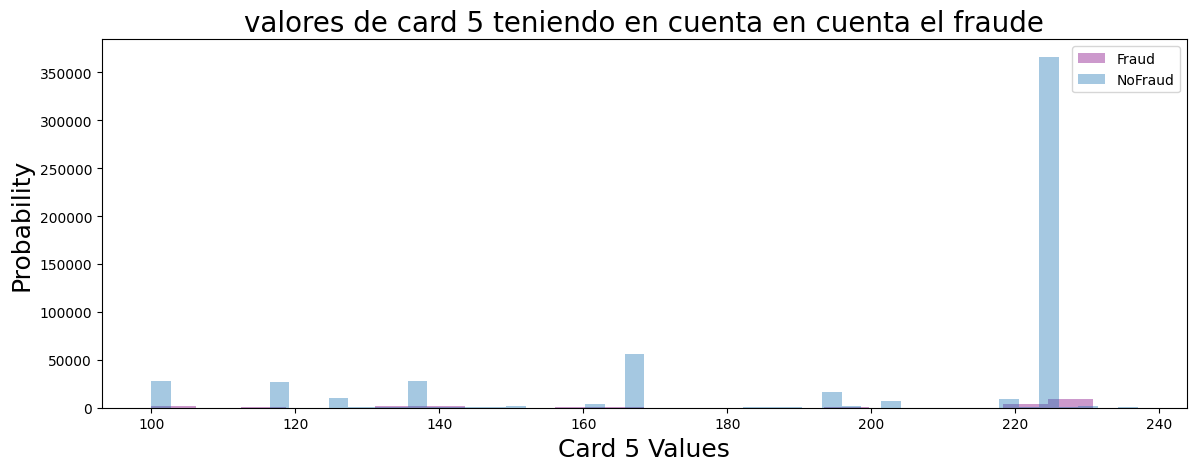

In [38]:
plt.figure(figsize=(14, 22))
plt.subplot(413)
g = sns.distplot(fraudmer[fraudmer['isFraud'] == 1]['card5'], color='purple', kde=False,label='Fraud')
g = sns.distplot(fraudmer[fraudmer['isFraud'] == 0]['card5'], kde=False,label='NoFraud')
g.legend()
g.set_title("valores de card 5 teniendo en cuenta en cuenta el fraude", fontsize=20)
g.set_xlabel("Card 5 Values", fontsize=18)
g.set_ylabel("Probability", fontsize=18)
plt.show()

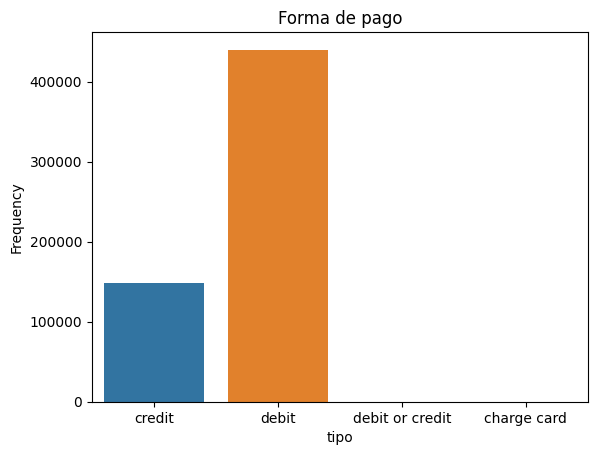

In [39]:
plt.title('Forma de pago')
sns.countplot(x=fraudmer.card6)
plt.xlabel('tipo')
plt.ylabel('Frequency')
plt.show()

In [40]:
fraudmer.card6.value_counts()

card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

In [41]:
fraudmer.card6.describe()

count     588969
unique         4
top        debit
freq      439938
Name: card6, dtype: object

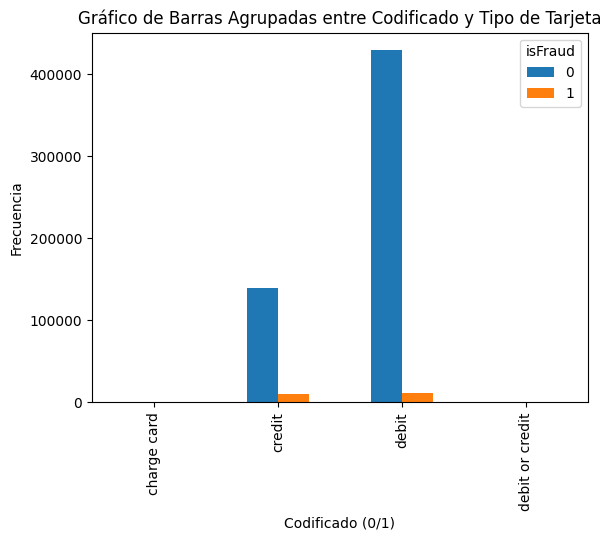

In [42]:
plot6 = pd.crosstab(fraudmer['card6'], fraudmer['isFraud'])

plot6.plot(kind='bar', stacked=False)

#etiquetas
plt.xlabel('Codificado (0/1)')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupadas entre Codificado y Tipo de Tarjeta')

plt.show()

en este caso, la mayoria de datos se encuentran en gran medida en la variable debit, seguido de credit, por lo cual existe un importante desbalance en estos datos

## preparacion de datos

ahora, arriba se menciono que hay datos que le faltan la mayoria de datos, por lo cual seria importante darle un manejo mas adelante

In [43]:
missing_percentage = (faltante / len(fraudmer)) * 100
missing_data_info = pd.DataFrame({
    'Columna': faltante.index,
    'Valores Faltantes': faltante.values,
    'Porcentaje Faltante': missing_percentage.values
})

In [44]:
missing_data_info.value_counts()

Columna  Valores Faltantes  Porcentaje Faltante
C1       0                  0.000000               1
V314     1269               0.214888               1
V324     508189             86.054967              1
V323     508189             86.054967              1
V322     508189             86.054967              1
                                                  ..
V185     450721             76.323534              1
V184     450721             76.323534              1
V183     450909             76.355370              1
V182     450909             76.355370              1
isFraud  0                  0.000000               1
Name: count, Length: 434, dtype: int64

con missing_data se hace un registro de las columnas que le faltan datos

In [45]:
corte = 0.7
missing_percentage = (fraudmer.isnull().sum() / len(fraudmer)).sort_values(ascending=False)

In [46]:
columns_to_drop = missing_percentage[missing_percentage > corte].index

In [47]:
fraudmer2 = fraudmer.drop(columns=columns_to_drop)

eliminamos las columnas cuyos datos faltantes equivalen al 70% o mas de sus datos.

In [48]:
fraudmer2

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


pasamos de tener 403 columnas a 226 columnas cuando eliminamos aquellas columnas que le faltan el 70% de datos

In [49]:
fraudmer2.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'M1', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
       'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68',
       'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77',
    

Creamos un .values del nuevo dataset para poder saber cuales columnas quedaron despues de eliminar el 70% de columnas con datos faltantes

igualmente sigue siendo un numero considerable de columnas, por lo cual seria importante reazlizar una limpieza mas grade de columnas

In [50]:
fraudmer2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 226 entries, TransactionID to V321
dtypes: float64(209), int64(4), object(13)
memory usage: 1018.2+ MB


In [51]:
for f in fraudmer2.drop('isFraud', axis=1).columns:
    if fraudmer2[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(fraudmer2[f].values))
        fraudmer2[f] = lbl.transform(list(fraudmer2[f].values))

con este 'for' convertimos todas las columnas que contienen objects en float, realizamos lo mismo con el data 'fraudmer' que contiene columnas eliminadas del 70% para comparar scores

In [52]:
fraudmer2

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,4,13926,NaN,150.0,1,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,4,2755,404.0,150.0,2,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,4,4663,490.0,150.0,4,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,4,18132,567.0,150.0,2,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,1,4497,514.0,150.0,2,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,4,6550,NaN,150.0,4,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,4,10444,225.0,150.0,2,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,4,12037,595.0,150.0,2,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,4,7826,481.0,150.0,2,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [53]:
fraudmer2
corr_matrix = fraudmer2.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
fraudmer2.drop(fraudmer2[to_drop], axis=1)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V284,V286,V288,V290,V291,V300,V305,V313,V314,V319
0,2987000,0,68.50,4,13926,NaN,150.0,1,142.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
1,2987001,0,29.00,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
2,2987002,0,59.00,4,4663,490.0,150.0,4,166.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,2987003,0,50.00,4,18132,567.0,150.0,2,117.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
4,2987004,0,50.00,1,4497,514.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,6550,NaN,150.0,4,226.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,47.950001,47.950001,0.000000
590536,3577536,0,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590537,3577537,0,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590538,3577538,0,117.00,4,7826,481.0,150.0,2,224.0,2,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,317.500000,669.500000,0.000000


In [54]:
fraudmer2=fraudmer2.drop(fraudmer2[to_drop], axis=1)
fraudmer2

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V284,V286,V288,V290,V291,V300,V305,V313,V314,V319
0,2987000,0,68.50,4,13926,NaN,150.0,1,142.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
1,2987001,0,29.00,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
2,2987002,0,59.00,4,4663,490.0,150.0,4,166.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,2987003,0,50.00,4,18132,567.0,150.0,2,117.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
4,2987004,0,50.00,1,4497,514.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,6550,NaN,150.0,4,226.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,47.950001,47.950001,0.000000
590536,3577536,0,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590537,3577537,0,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590538,3577538,0,117.00,4,7826,481.0,150.0,2,224.0,2,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,317.500000,669.500000,0.000000


In [55]:
fraudmer2

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V284,V286,V288,V290,V291,V300,V305,V313,V314,V319
0,2987000,0,68.50,4,13926,NaN,150.0,1,142.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
1,2987001,0,29.00,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
2,2987002,0,59.00,4,4663,490.0,150.0,4,166.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,2987003,0,50.00,4,18132,567.0,150.0,2,117.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
4,2987004,0,50.00,1,4497,514.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,6550,NaN,150.0,4,226.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,47.950001,47.950001,0.000000
590536,3577536,0,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590537,3577537,0,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590538,3577538,0,117.00,4,7826,481.0,150.0,2,224.0,2,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,317.500000,669.500000,0.000000


ahora pasamos de tener 226 columnas a 92 columnas, un numero considerablemente menor

In [56]:
from sklearn import preprocessing

In [57]:
fraudmer2

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V284,V286,V288,V290,V291,V300,V305,V313,V314,V319
0,2987000,0,68.50,4,13926,NaN,150.0,1,142.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
1,2987001,0,29.00,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
2,2987002,0,59.00,4,4663,490.0,150.0,4,166.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,2987003,0,50.00,4,18132,567.0,150.0,2,117.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
4,2987004,0,50.00,1,4497,514.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,6550,NaN,150.0,4,226.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,47.950001,47.950001,0.000000
590536,3577536,0,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590537,3577537,0,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590538,3577538,0,117.00,4,7826,481.0,150.0,2,224.0,2,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,317.500000,669.500000,0.000000


al final quedamos con 92 columnas y 590540 filas a los cuales se le eliminaron las columnas que tenian igual o mas del 70% de las columnas vacias y aquellos que quedaron, fueron rellenados teniendo en cuenta la mediana

Solamente por probar, se cuentan todos los datos que tienen datos vacios, solamente para saber que informacion falta pues segun la informacion suministrada, existe cierta informacion que llegado cierto valor, seria normal que no estuviera llena o estuviera escrita con nan, por lo cual esta informacion no seria utilizada para el dataset

In [58]:
df_clean = fraudmer2.dropna()

Eliminar filas vaci­as (aquellas que contienen al menos un valor NaN)

In [59]:
print(df_clean)

        TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  \
9             2987009        0          117.00          4  17399  111.0   
35            2987035        0          107.95          4   9766  360.0   
36            2987036        0           77.00          4   4806  490.0   
45            2987045        0           36.95          4  16132  111.0   
51            2987051        0          226.00          4   7835  361.0   
...               ...      ...             ...        ...    ...    ...   
590520        3577520        0           93.00          4  17150  292.0   
590522        3577522        0           54.50          4   3166  559.0   
590525        3577525        0           57.95          4  11942  570.0   
590533        3577533        0          107.95          4  13071  321.0   
590538        3577538        0          117.00          4   7826  481.0   

        card3  card4  card5  card6  ...  V284  V286  V288  V290  V291  V300  \
9       150.0      2

## Utilizacion de la mediana para rellenar NAN

como se puede notar, si se eliminan los datos faltantes, nos quedamos con menos del 10% de los datos, pues nos quedamos con solamente 40737 datos de 590540 que habian anteriormente, por lo cual no seria buena idea eliminar todos los datos que contienen N por lo cual seria importante utilizar la mediana para realizar 

In [60]:
df=fraudmer2

In [61]:
column_medians = df.median()

In [62]:
df = df.fillna(column_medians)

In [63]:
df

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V284,V286,V288,V290,V291,V300,V305,V313,V314,V319
0,2987000,0,68.50,4,13926,361.0,150.0,1,142.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
1,2987001,0,29.00,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
2,2987002,0,59.00,4,4663,490.0,150.0,4,166.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,2987003,0,50.00,4,18132,567.0,150.0,2,117.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
4,2987004,0,50.00,1,4497,514.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,6550,361.0,150.0,4,226.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,47.950001,47.950001,0.000000
590536,3577536,0,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590537,3577537,0,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590538,3577538,0,117.00,4,7826,481.0,150.0,2,224.0,2,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,317.500000,669.500000,0.000000


In [64]:
fraudmer2=df
fraudmer2

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V284,V286,V288,V290,V291,V300,V305,V313,V314,V319
0,2987000,0,68.50,4,13926,361.0,150.0,1,142.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
1,2987001,0,29.00,4,2755,404.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
2,2987002,0,59.00,4,4663,490.0,150.0,4,166.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,2987003,0,50.00,4,18132,567.0,150.0,2,117.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
4,2987004,0,50.00,1,4497,514.0,150.0,2,102.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,6550,361.0,150.0,4,226.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,47.950001,47.950001,0.000000
590536,3577536,0,39.50,4,10444,225.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590537,3577537,0,30.95,4,12037,595.0,150.0,2,224.0,2,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
590538,3577538,0,117.00,4,7826,481.0,150.0,2,224.0,2,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,317.500000,669.500000,0.000000


## Modelos

A continuacion probramos los 5 modelos para obtener su preccision, recall, f1 score y AUC

In [112]:
svm_model = SVC(kernel='linear', max_iter=50,probability=True, random_state=123)
xb_model = XGBClassifier(random_state=123)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=20,random_state=123)
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear', random_state=123)
ridge_classifier = RidgeClassifier(alpha=0.1)

In [66]:
X = fraudmer2.drop('isFraud',axis=1)
y = fraudmer2['isFraud']


In [67]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X,y, random_state=123, test_size=0.2)

SVM

In [68]:
svm_model.fit(X_train_,y_train_)
y_pred = svm_model.predict(X_test_)
y_probSVM = svm_model.predict_proba(X_test_)[:, 1]
print(classification_report(y_test_,svm_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.97      0.27      0.42    113961
           1       0.04      0.74      0.07      4147

    accuracy                           0.28    118108
   macro avg       0.50      0.50      0.24    118108
weighted avg       0.93      0.28      0.40    118108



In [69]:
SVMauc_score = roc_auc_score(y_test_, y_probSVM)
print("SVM AUC-ROC Score:", SVMauc_score)

SVM AUC-ROC Score: 0.47785357348156965


xgboost

In [70]:
xb_model.fit(X_train_,y_train_)
y_pred = xb_model.predict(X_test_)
y_probxb = xb_model.predict_proba(X_test_)[:, 1]
print(classification_report(y_test_,xb_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113961
           1       0.90      0.43      0.58      4147

    accuracy                           0.98    118108
   macro avg       0.94      0.71      0.79    118108
weighted avg       0.98      0.98      0.97    118108



In [71]:
aucxb = roc_auc_score(y_test_, y_probxb)
print("XGBOOST AUC-ROC Score:", aucxb)


XGBOOST AUC-ROC Score: 0.9283286192355811


MLP

In [72]:
mlp_classifier.fit(X_train_, y_train_)
y_pred = mlp_classifier.predict(X_test_)
y_probmlp = mlp_classifier.predict_proba(X_test_)[:, 1]
print(classification_report(y_test_,mlp_classifier.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    113961
           1       0.00      0.00      0.00      4147

    accuracy                           0.96    118108
   macro avg       0.48      0.50      0.49    118108
weighted avg       0.93      0.96      0.95    118108



In [73]:
mlp_score = roc_auc_score(y_test_, y_probmlp)
print("MLP AUC-ROC Score:", mlp_score)

MLP AUC-ROC Score: 0.5


KNN

In [74]:
knn_model.fit(X_train_,y_train_)
y_pred = knn_model.predict(X_test_)
y_probknn = knn_model.predict_proba(X_test_)[:, 1]
print(classification_report(y_test_,knn_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    113961
           1       0.44      0.13      0.20      4147

    accuracy                           0.96    118108
   macro avg       0.71      0.56      0.59    118108
weighted avg       0.95      0.96      0.95    118108



In [75]:
KNNauc_score = roc_auc_score(y_test_, y_probknn)
print("KNN AUC-ROC Score:", KNNauc_score)

KNN AUC-ROC Score: 0.7219557311907417


Naive Bayes

In [76]:
nb_model.fit(X_train_,y_train_)
y_pred = nb_model.predict(X_test_)
y_probNB = nb_model.predict_proba(X_test_)[:, 1]
print(classification_report(y_test_,nb_model.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.98      0.43      0.59    113961
           1       0.05      0.80      0.09      4147

    accuracy                           0.44    118108
   macro avg       0.52      0.62      0.34    118108
weighted avg       0.95      0.44      0.58    118108



In [77]:
nbauc_score = roc_auc_score(y_test_, y_probNB)
print("NB AUC-ROC Score:", nbauc_score)


NB AUC-ROC Score: 0.7098196799764396


LASSO

In [78]:
lasso_classifier.fit(X_train_,y_train_)
y_pred = lasso_classifier.predict(X_test_)
y_probLA = lasso_classifier.predict_proba(X_test_)[:, 1]
print(classification_report(y_test_,lasso_classifier.predict(X_test_)))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113961
           1       0.78      0.11      0.20      4147

    accuracy                           0.97    118108
   macro avg       0.87      0.56      0.59    118108
weighted avg       0.96      0.97      0.96    118108



In [79]:
laauc_score = roc_auc_score(y_test_, y_probLA)
print("NB AUC-ROC Score:", laauc_score)

NB AUC-ROC Score: 0.8057411189834895


En este ejercicio, el modelo de clasificacion que tuvo mejor la precision, recall, f1-score y AUC usando la configuracion por defecto de los modelos de xgboost obteniendo , el que obtuvo el AUC mas bajo fue MLP, los modelos que obtuvieron los puntajes mas bajos fueron SVM y MLP posiblemente debido a los pocos parametros que fueron utilizados en el, es cuiroso que aunque llaso no se suele utilizar en problemas de classificacion, tuvo un AUC mas alto que otros modelos


ahora seria realizar el analisis exploratoria del segundo dataset, el relacionado a windspeed


## Punto modelo de regresion de velocidad del viento

In [5]:
wind= pd.read_csv('C:/Users/crist/OneDrive/Escritorio/parcialmachinelearning/wind speed/data_treino_dv_df_2000_2010.csv')

In [6]:
wind

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19:00,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1
87689,20:00,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9
87690,21:00,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2
87691,22:00,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6


se puede observar que el dataset tiene originalmente 13 columnas y 87693 filas

In [7]:
print(wind.columns.values)

['HORA (UTC)' 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))'
 'VENTO, VELOCIDADE HORARIA (m/s)'
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'
 'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)'
 'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)'
 'UMIDADE RELATIVA DO AR, HORARIA (%)'
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
 'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)' 'VENTO, RAJADA MAXIMA (m/s)'
 'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'
 'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)']


se puede notar que el lenguaje utilizado en el dataset es extenso y no es español, por lo cual estaria bien realizar un renombre de columnas mas adelante

In [8]:
wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


por ahora no se observan datos vacios

In [9]:
wind['HORA (UTC)'] = wind['HORA (UTC)'].str.replace(r':\d+', '', regex=True)

In [10]:
wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


con este condigo cambiamos el formato de hora para que solo nos muestre la hora y no los minutos

In [11]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

en este caso se puede ver que todas las variables son numericas a excepcion de hora, en este caso la convertiremos en float

In [12]:
wind['HORA (UTC)'] = wind['HORA (UTC)'].astype('float64')

In [13]:
wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12.0,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13.0,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14.0,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15.0,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16.0,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


ahora el objetivo seria ver si el dataset tiene datos vacios

In [14]:
wind.isnull().sum()

HORA (UTC)                                               0
VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))               0
VENTO, VELOCIDADE HORARIA (m/s)                          0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)           0
TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)           0
UMIDADE RELATIVA DO AR, HORARIA (%)                      0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)                   0
VENTO, RAJADA MAXIMA (m/s)                               0
PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        0
PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       0
dtype: int64

In [15]:
df_clean2 = wind.dropna()


In [16]:
print(df_clean2)

       HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0            12.0                                    0.809017   
1            13.0                                    0.965926   
2            14.0                                    0.891007   
3            15.0                                    0.848048   
4            16.0                                    0.224951   
...           ...                                         ...   
87688        19.0                                   -0.615661   
87689        20.0                                   -0.469472   
87690        21.0                                   -0.484810   
87691        22.0                                   -0.484810   
87692        23.0                                   -0.573576   

       VENTO, VELOCIDADE HORARIA (m/s)  \
0                                  1.8   
1                                  2.7   
2                                  2.0   
3                                  2.5   
4        

en este caso, a diferencia del dataset anterior, no existen datos vacios, pero debido a la forma que se llaman las columnas, seria mejor renombrarlas para un mejor manejo, como tambien una mejor graficacion

In [17]:
nombres_nuevos = {'HORA (UTC)': 'HORA','VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'Dirección del viento horaria',
                  'VENTO, VELOCIDADE HORARIA (m/s)': 'Velocidad horario del viento (m/s)', 
                  'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Humedad rel. máx aut',
                  'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)':'Humedad rel. mín aut',
                  'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperatura máx. AUT',
                  'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperatura mín. AUT',
                  'UMIDADE RELATIVA DO AR, HORARIA (%)':'Humedad relativa',
                  'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':'Presión atmosférica',
                  'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)':' Precipitación total',
                  'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Presiatmosmax',
                  'VENTO, RAJADA MAXIMA (m/s)': 'Máxima ráfaga de viento',
                  'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Presión atmosférica mín.',}

In [18]:
wind.rename(columns=nombres_nuevos, inplace=True)
wind

,HORA,Dirección del viento horaria,Velocidad horario del viento (m/s),Humedad rel. máx aut,Humedad rel. mín aut,Temperatura máx. AUT,Temperatura mín. AUT,Humedad relativa,Presión atmosférica,Precipitación total,Máxima ráfaga de viento,Presiatmosmax,Presión atmosférica mín.
0,12.0,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13.0,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14.0,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15.0,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16.0,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19.0,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1
87689,20.0,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9
87690,21.0,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2
87691,22.0,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6


In [19]:
wind.describe().T

,count,mean,std,min,25%,50%,75%,max
HORA,87693.0,11.506437,6.932300,0.0,5.000000,12.000000,18.000000,23.0
Dirección del viento horaria,87693.0,0.405810,0.686247,-1.0,-0.156434,0.788011,0.970296,1.0
Velocidad horario del viento (m/s),87693.0,2.466192,1.313968,0.0,1.500000,2.400000,3.400000,10.0
Humedad rel. máx aut,87693.0,69.058465,19.640222,12.0,54.000000,72.000000,87.000000,100.0
Humedad rel. mín aut,87693.0,63.176194,20.166336,10.0,48.000000,64.000000,80.000000,98.0
Temperatura máx. AUT,87693.0,21.921264,3.721386,9.2,19.200000,21.400000,24.700000,35.3
Temperatura mín. AUT,87693.0,20.684570,3.513744,8.4,18.400000,20.200000,23.100000,34.4
Humedad relativa,87693.0,66.146682,19.992327,10.0,51.000000,68.000000,84.000000,99.0
Presión atmosférica,87693.0,887.251925,4.012404,863.4,885.300000,887.200000,889.100000,1023.5
Precipitación total,87693.0,0.160907,1.307515,0.0,0.000000,0.000000,0.000000,70.8


los datos ya parecen organizados

Column:  HORA
Skew: -0.0
Kurtosis:  -1.21


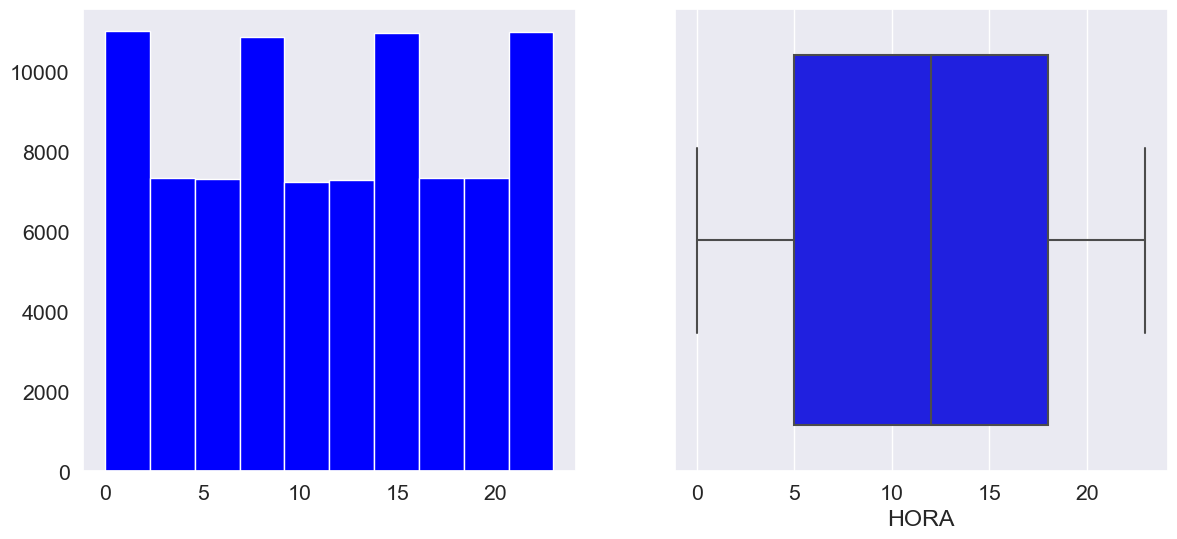

Column:  Dirección del viento horaria
Skew: -0.86
Kurtosis:  -0.82


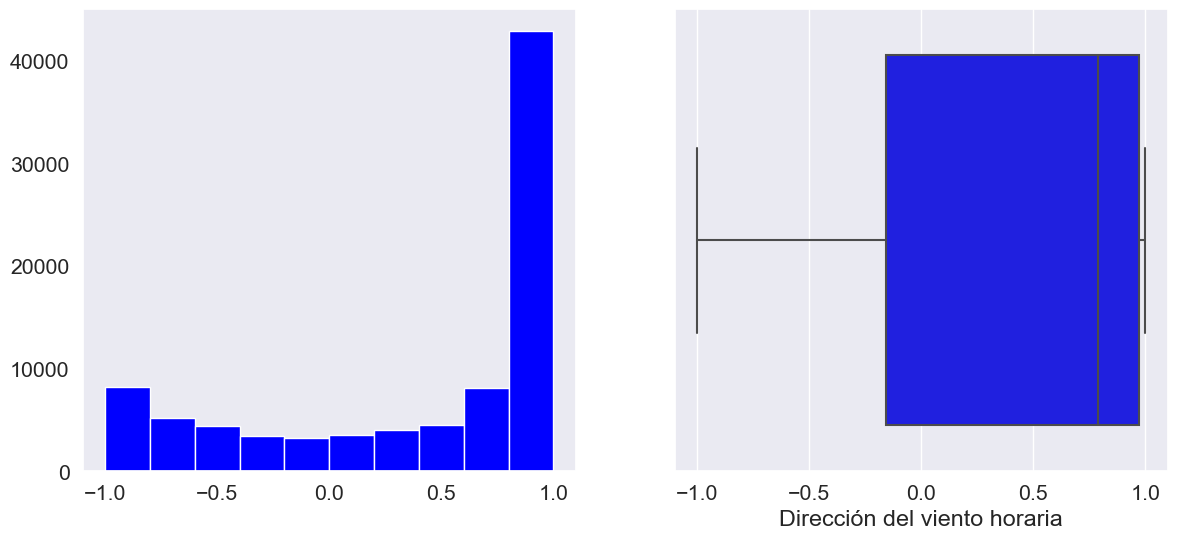

Column:  Velocidad horario del viento (m/s)
Skew: 0.37
Kurtosis:  -0.11


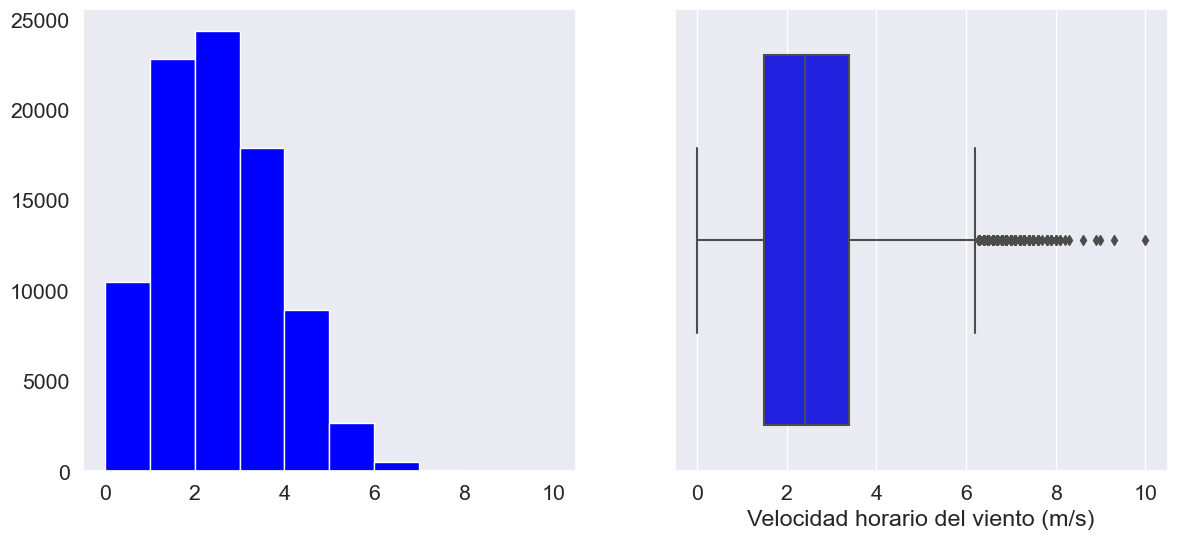

Column:  Humedad rel. máx aut
Skew: -0.48
Kurtosis:  -0.78


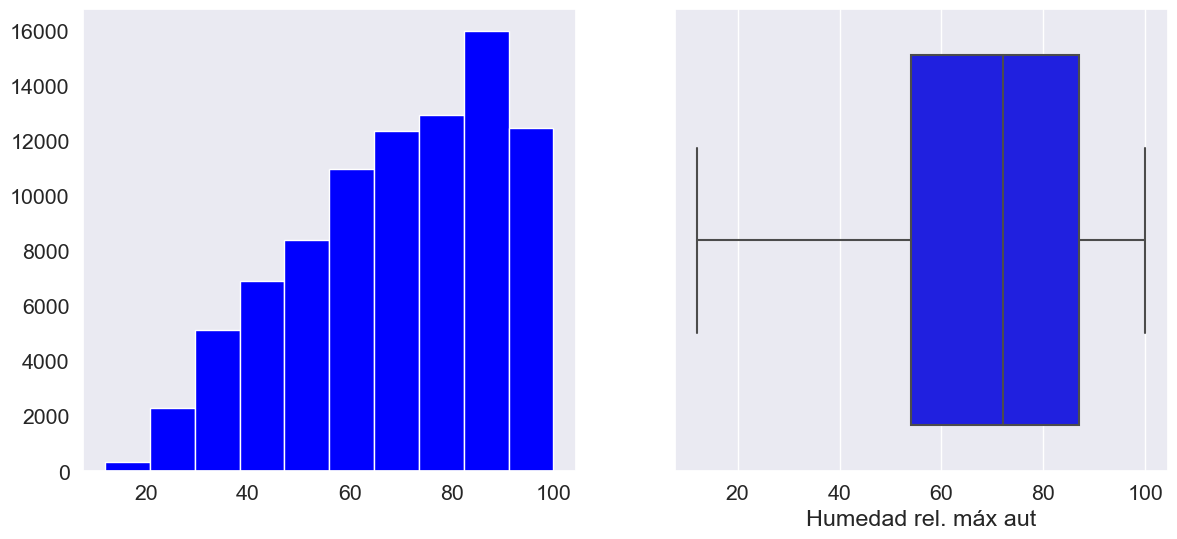

Column:  Humedad rel. mín aut
Skew: -0.23
Kurtosis:  -0.96


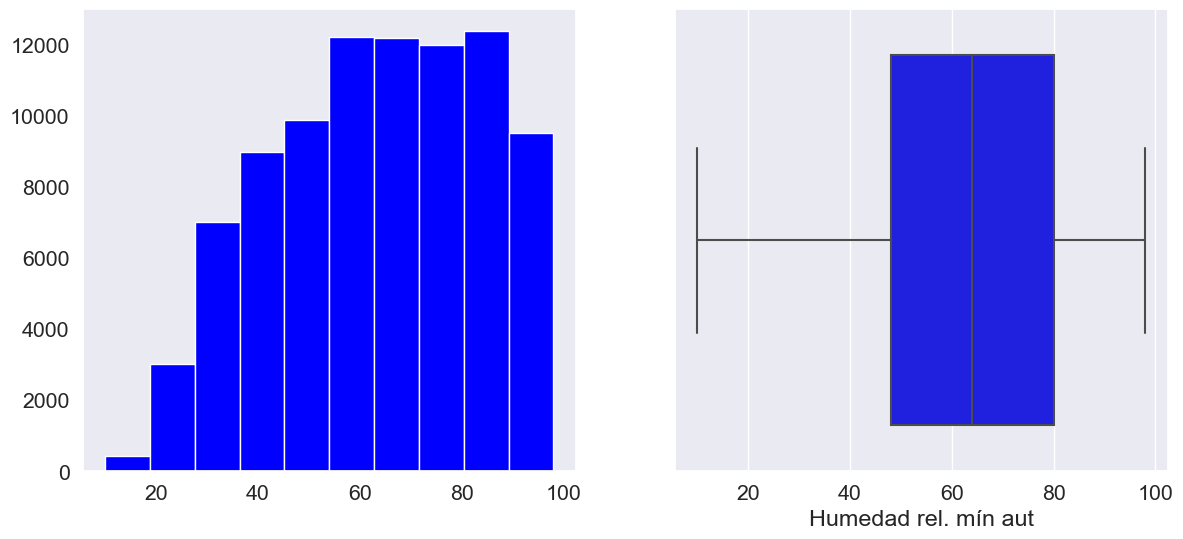

Column:  Temperatura máx. AUT
Skew: 0.26
Kurtosis:  -0.42


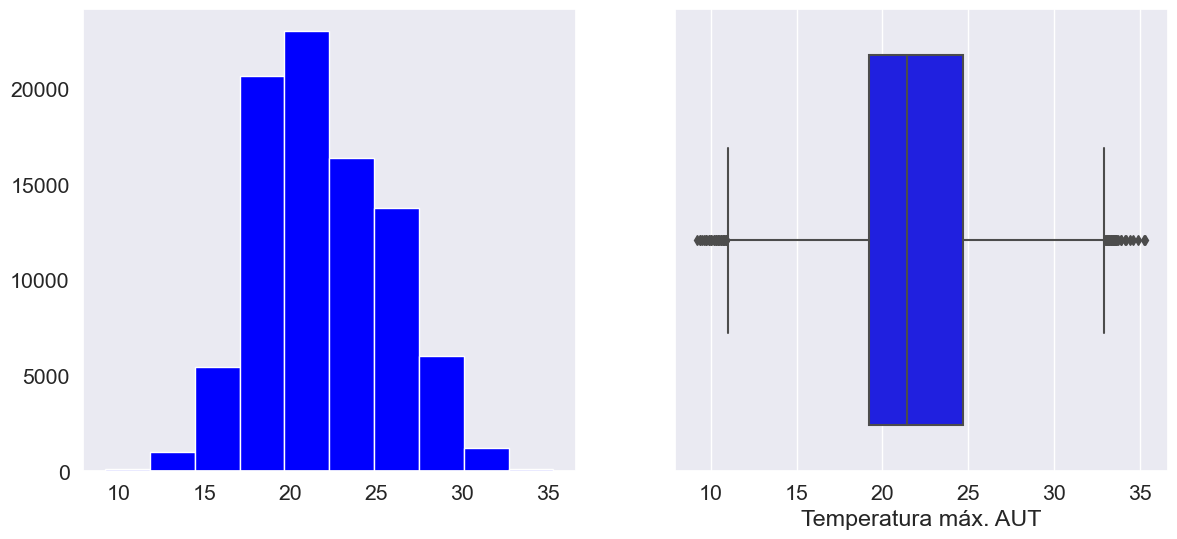

Column:  Temperatura mín. AUT
Skew: 0.24
Kurtosis:  -0.12


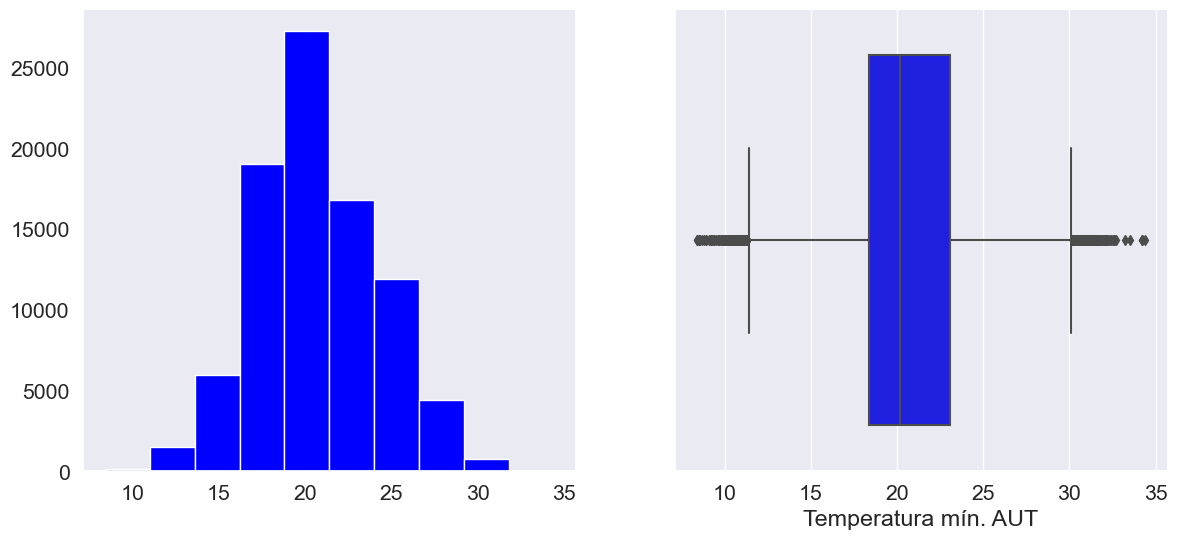

Column:  Humedad relativa
Skew: -0.35
Kurtosis:  -0.89


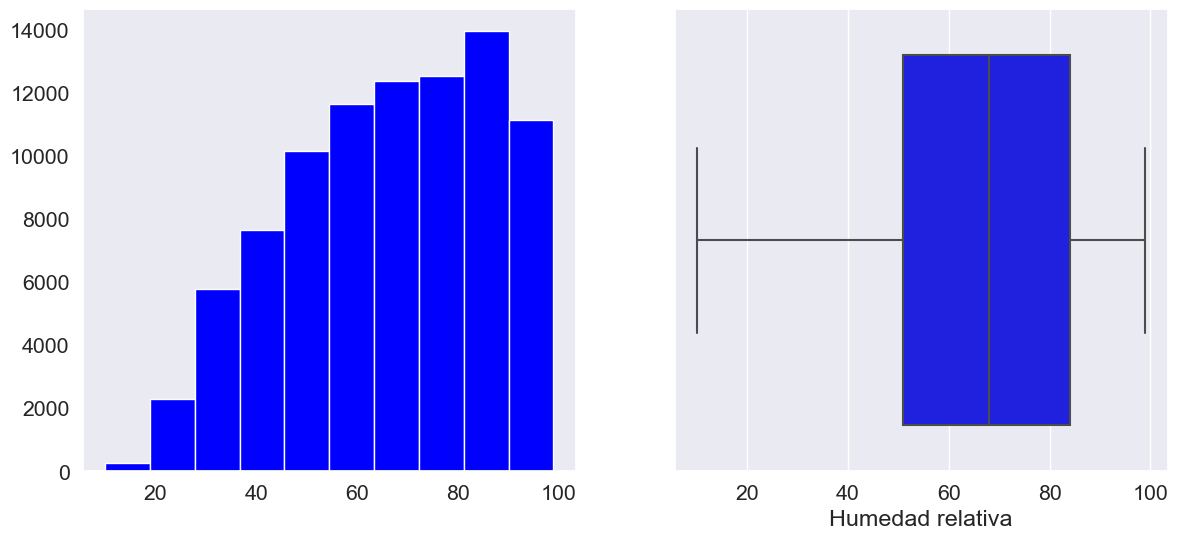

Column:  Presión atmosférica
Skew: 6.18
Kurtosis:  179.64


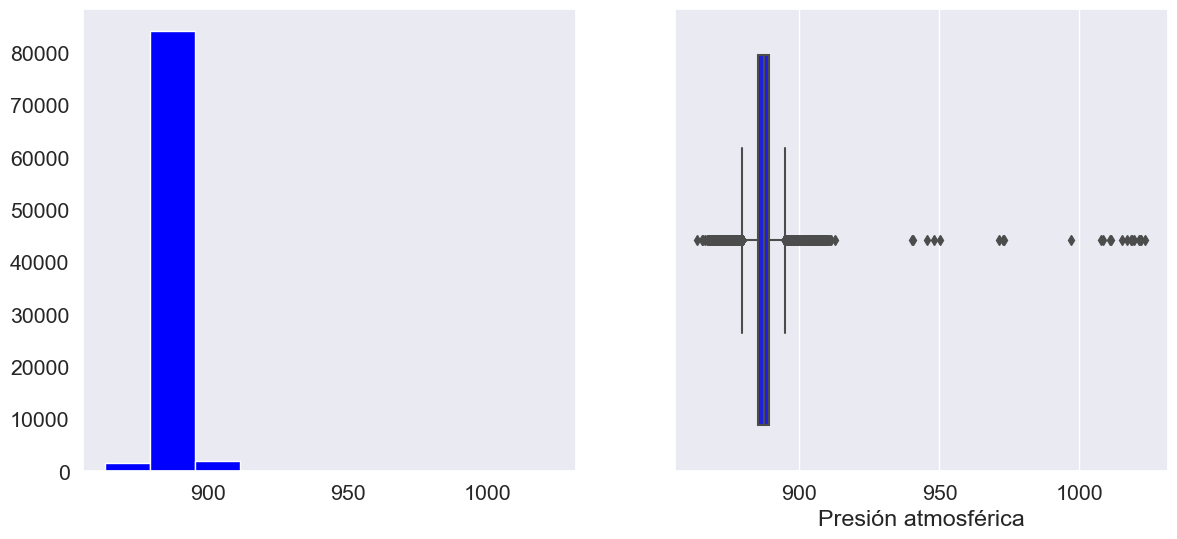

Column:   Precipitación total
Skew: 17.65
Kurtosis:  476.4


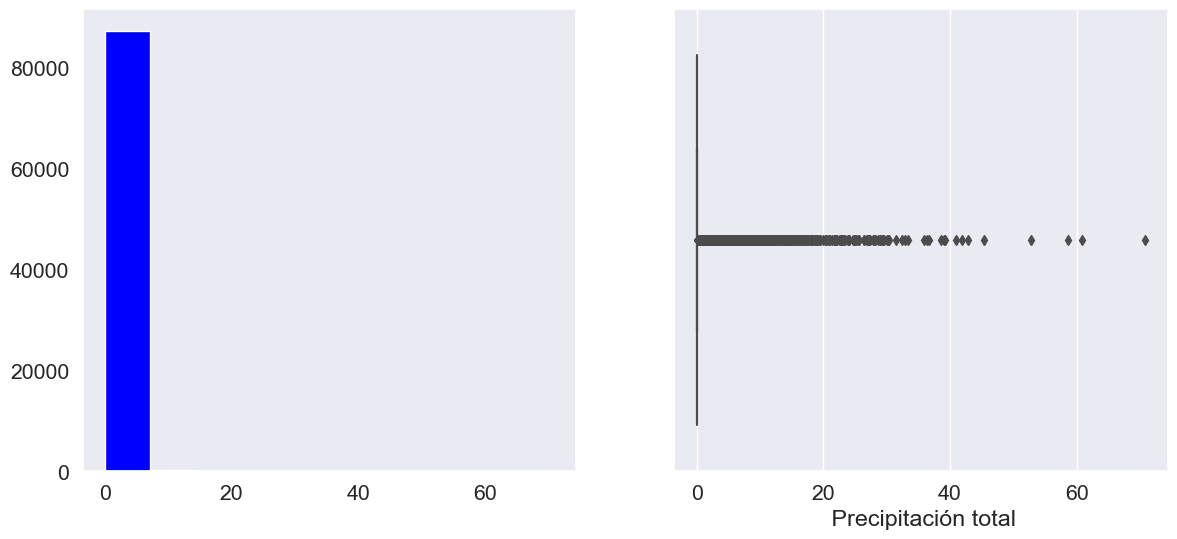

Column:  Máxima ráfaga de viento
Skew: 0.41
Kurtosis:  0.11


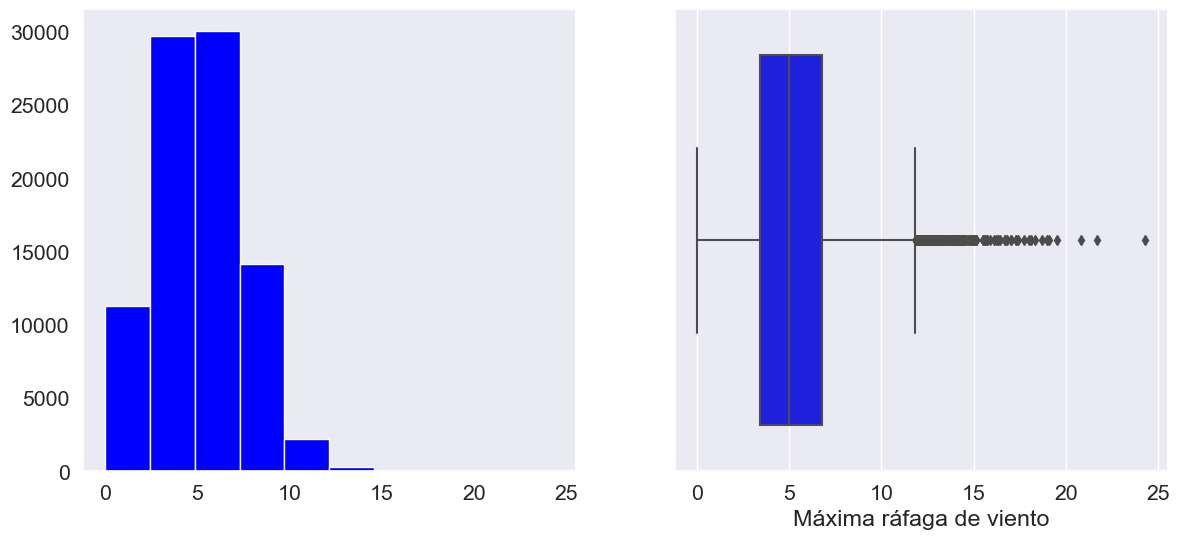

Column:  Presiatmosmax
Skew: 1.02
Kurtosis:  5.82


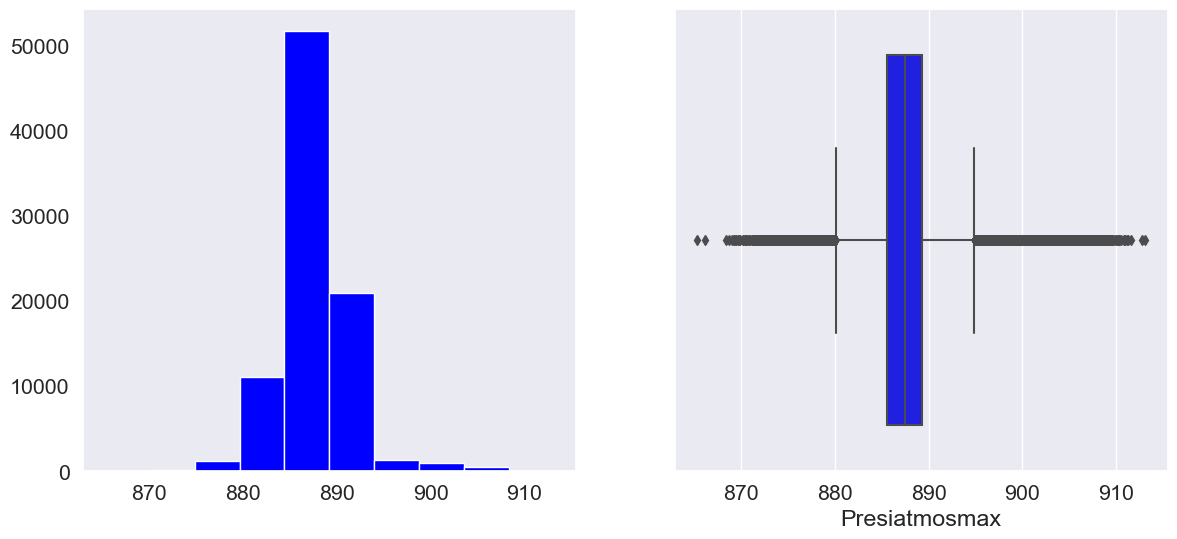

Column:  Presión atmosférica mín.
Skew: 0.33
Kurtosis:  4.91


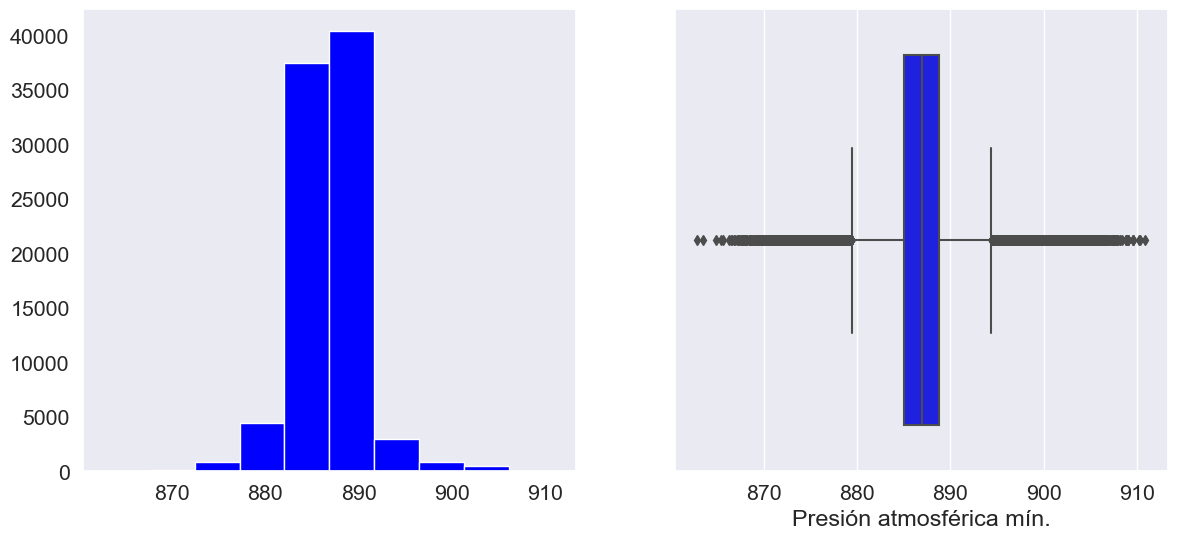

In [20]:
num_cols = wind.select_dtypes(include=np.number).columns.tolist()
sns.set(font_scale=1.4)
color = 'blue'

for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(wind[col].skew(), 2))
    print('Kurtosis: ', round(wind[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    wind[col].hist(grid=False, color=color)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=wind[col], color=color)
    plt.show()

Se podria decir que existen ciertos datos que se encuentran sesgados pero es normal en algunos en cierta debida debido a que se miden minimos y maximos en cada uno, en el caso de la direccion del viento (m/s) este tiene cierta tendencia a la derecha mientras que la velocidad del viento es a la izquierda, siendo velocidades poco fuerte y disfrutables para el ser humano. respecto a la humedad, se puede observar que la humedad relativa, la humedad min y max tienen cierta tendencia a la izquierda,  caso curioso teniendo en cuenta que deberian ser medidas opuestas pero terminan generando una alta correlacion en los datos, lo mismo sucede en el caso al evaluar tanto la temperatura o minima, en ambos casos estos datos dan a entender que los datos se mantuvieron en condiciones ambientales relativamente estables y constantes al momento de obtener dhicos datos, lo mismo sucede con la precion atmosferica, la precipitacion total, la rafaga maxima de viento y la presion atmosferica, siendo datos que se mantienen en niveles constantes en el tiempo.
De manera general, hay muchos datos con bastante correlacion y que se encuentran muy constantes, por lo cual seria importante realizar una limpieza de estos datos.

ahora realizamos un regplot bivariado de la velocidad horaria del viento con el resto de datos con el fin de conocer si existe cierta correlacion

In [21]:
def scatter_regplot(wind, strx, stry, scatter_color='blue', regplot_color='lightpink'):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=wind, x=strx, y=stry, ax=ax[0], color=scatter_color)  # Set scatterplot color
    sns.regplot(data=wind, x=strx, y=stry, ax=ax[1], color=regplot_color)  # Set regression plot color
    fig.suptitle('Relación entre %s y Velocidad horario del viento (m/s)' % col)




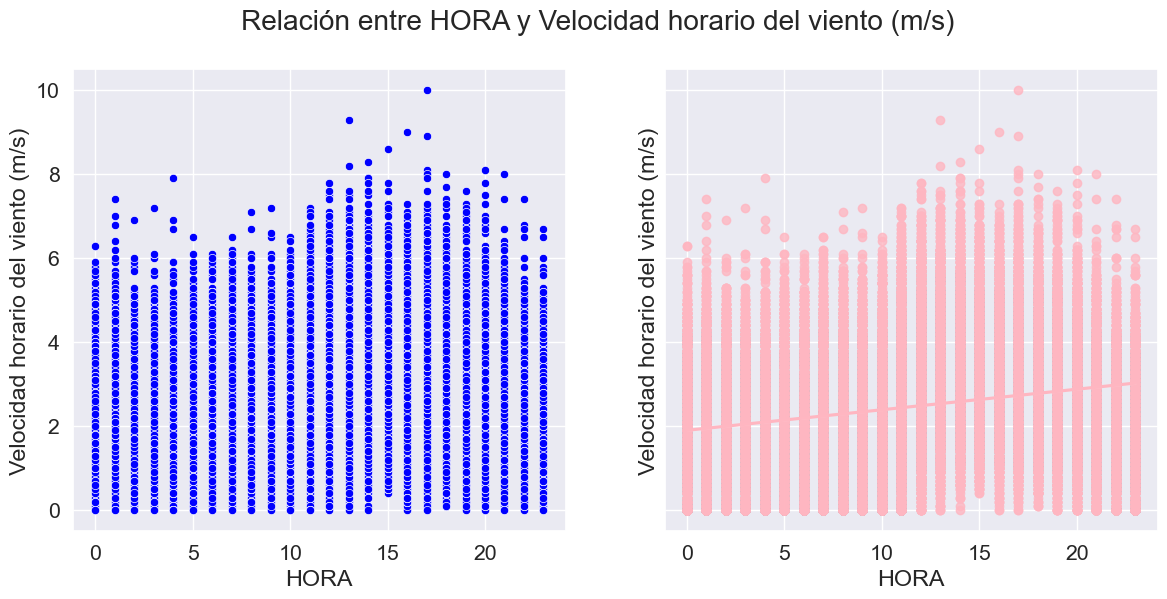

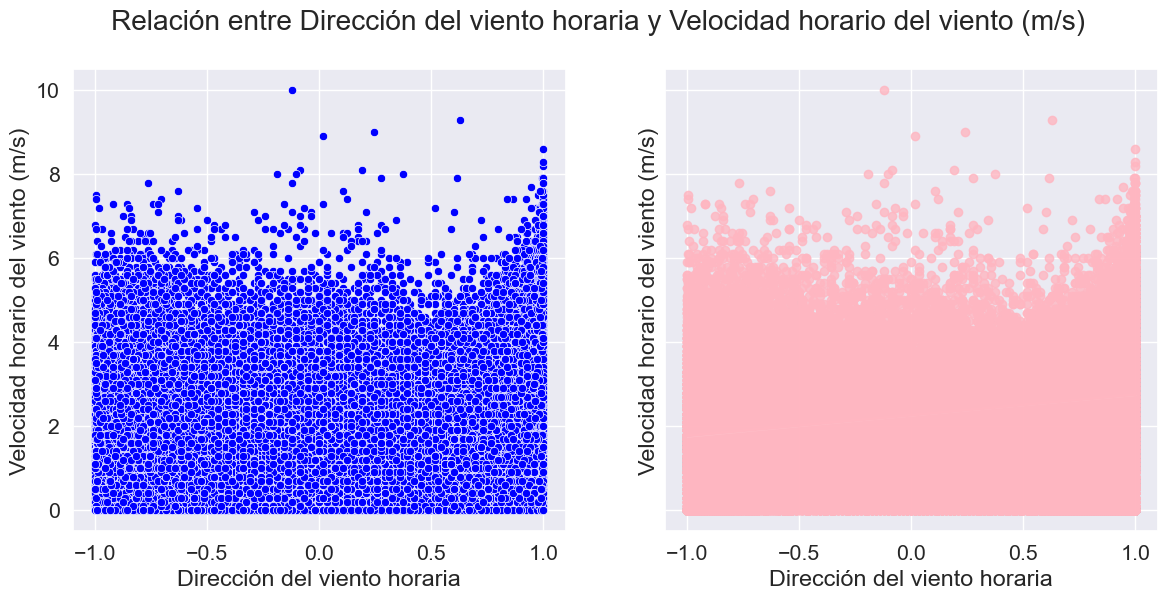

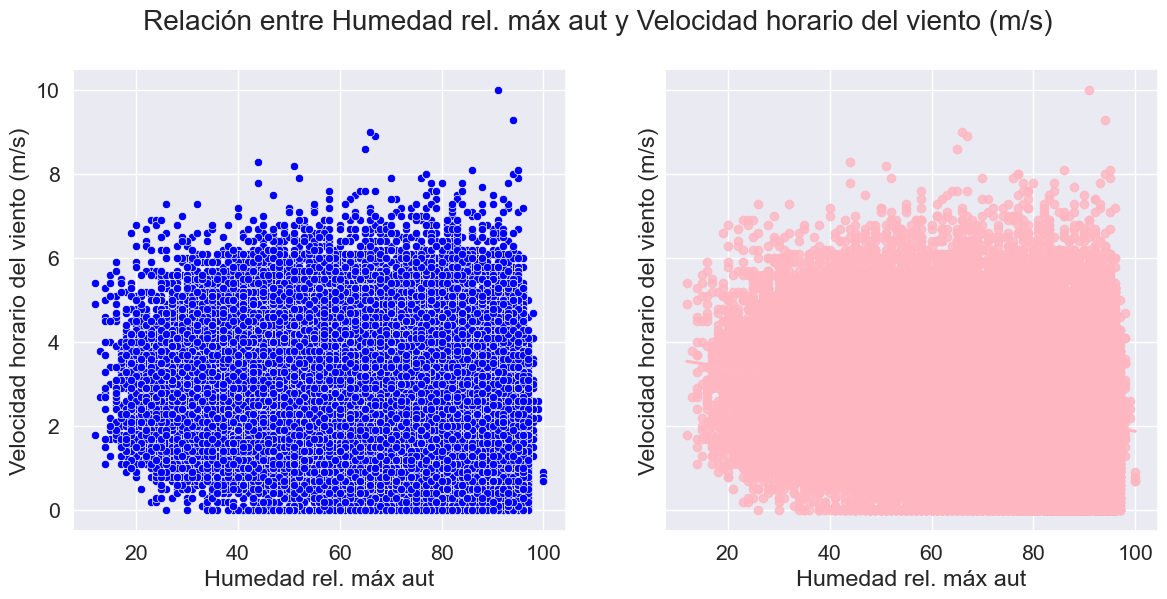

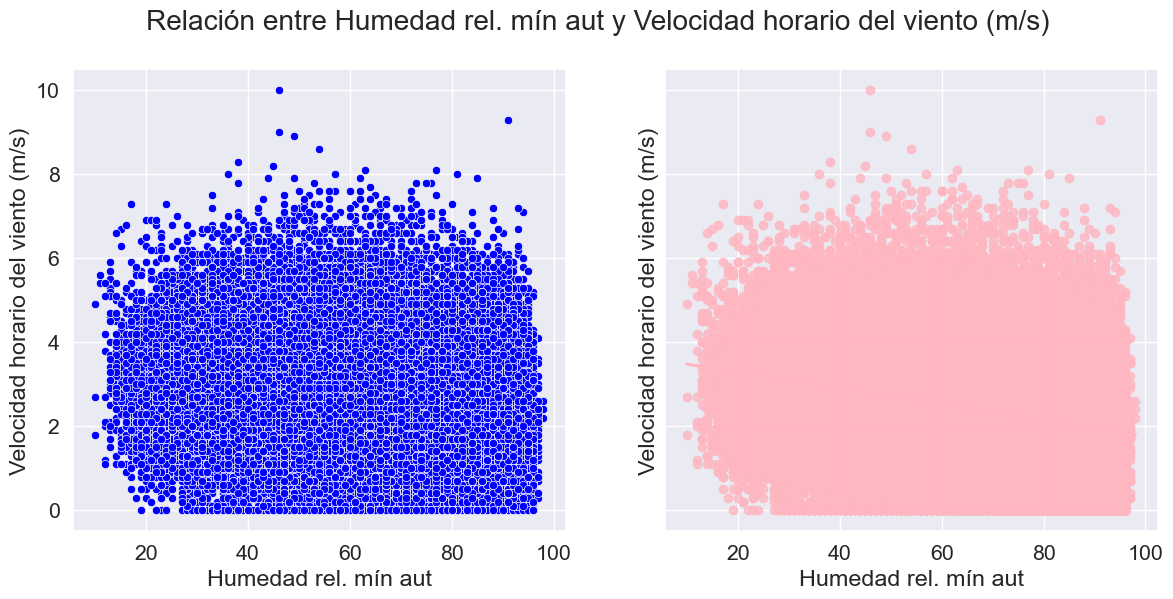

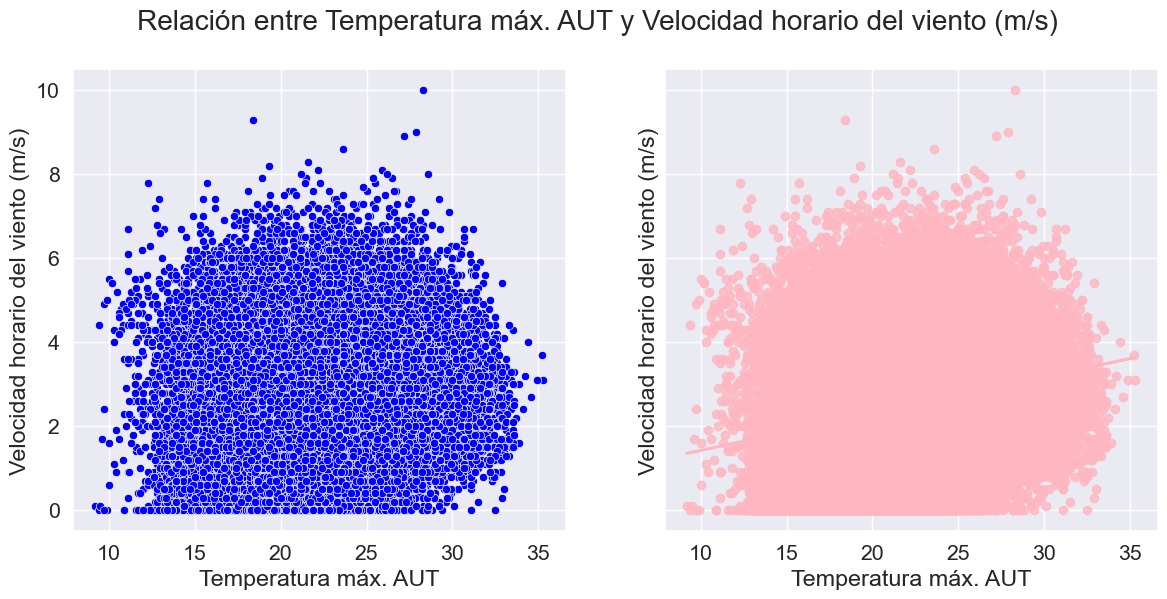

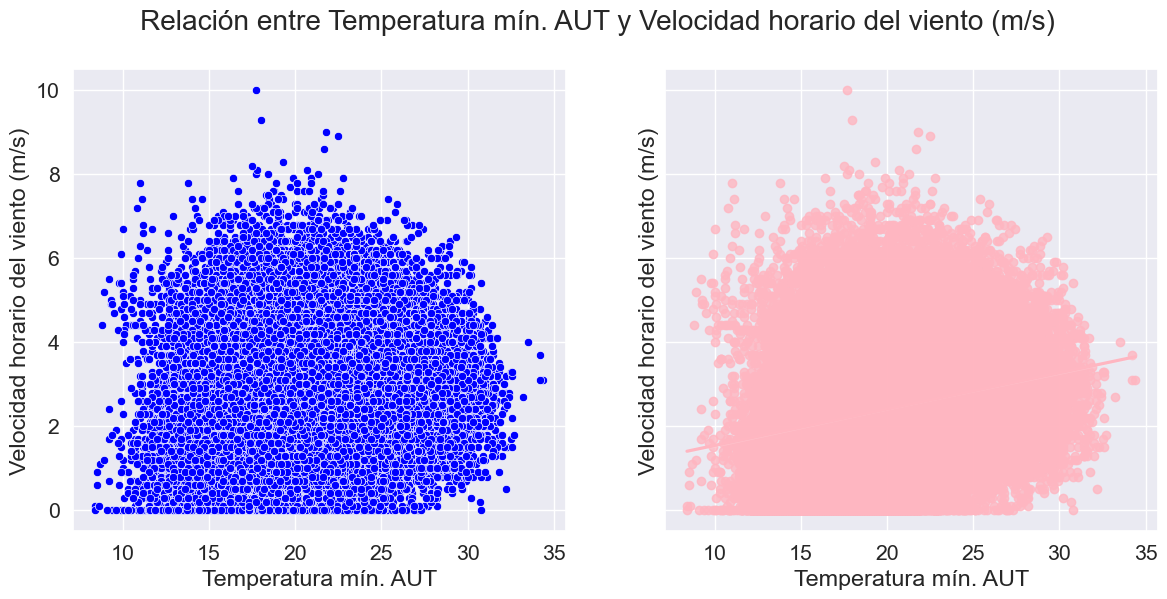

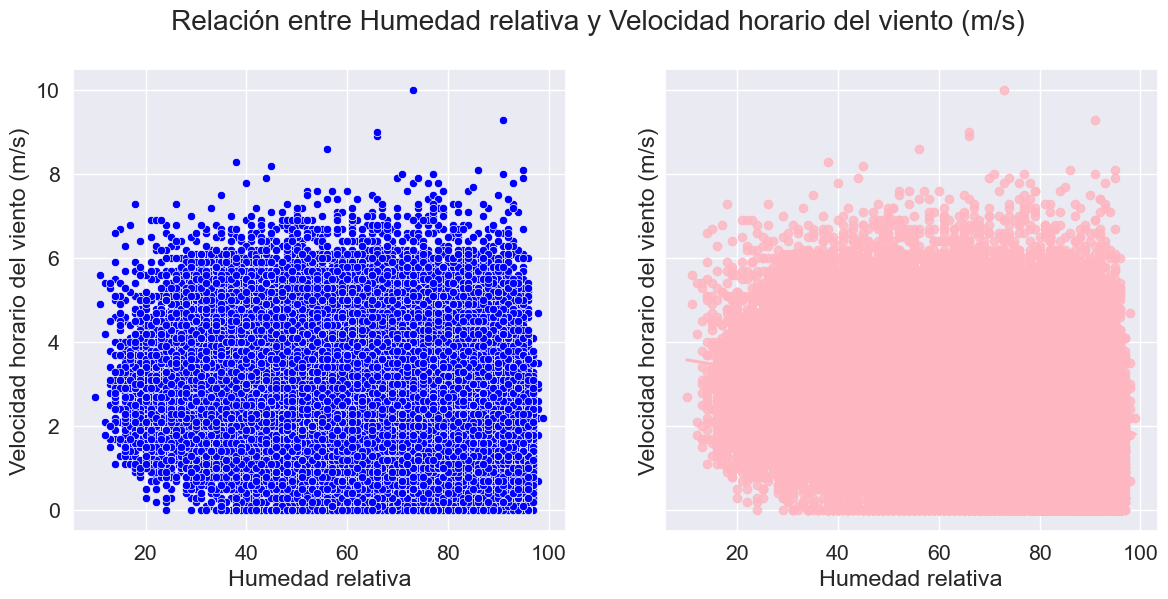

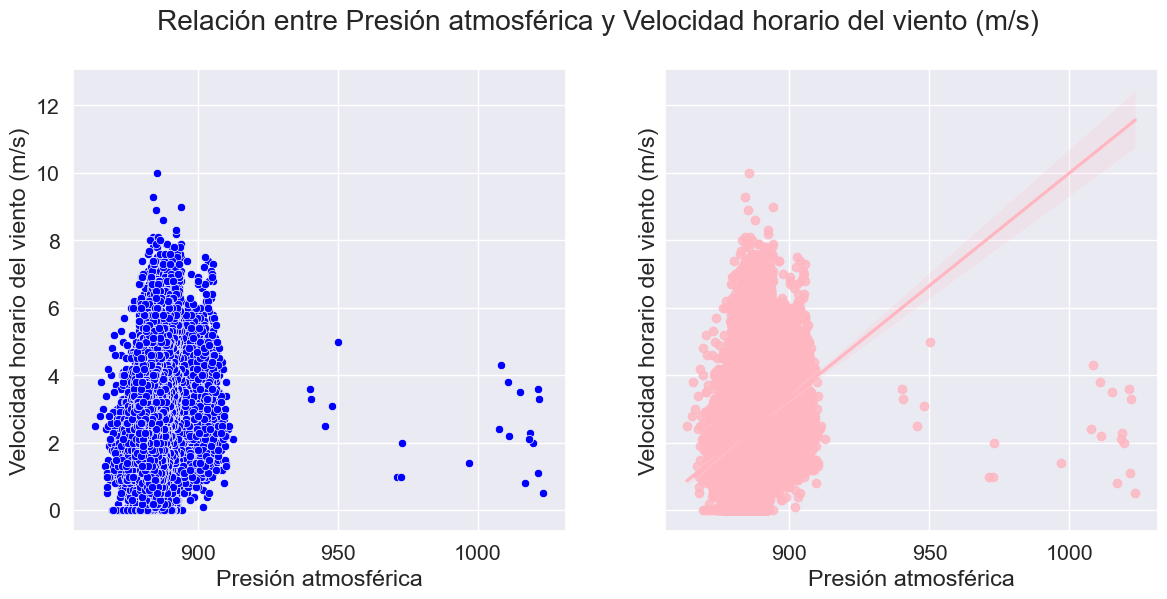

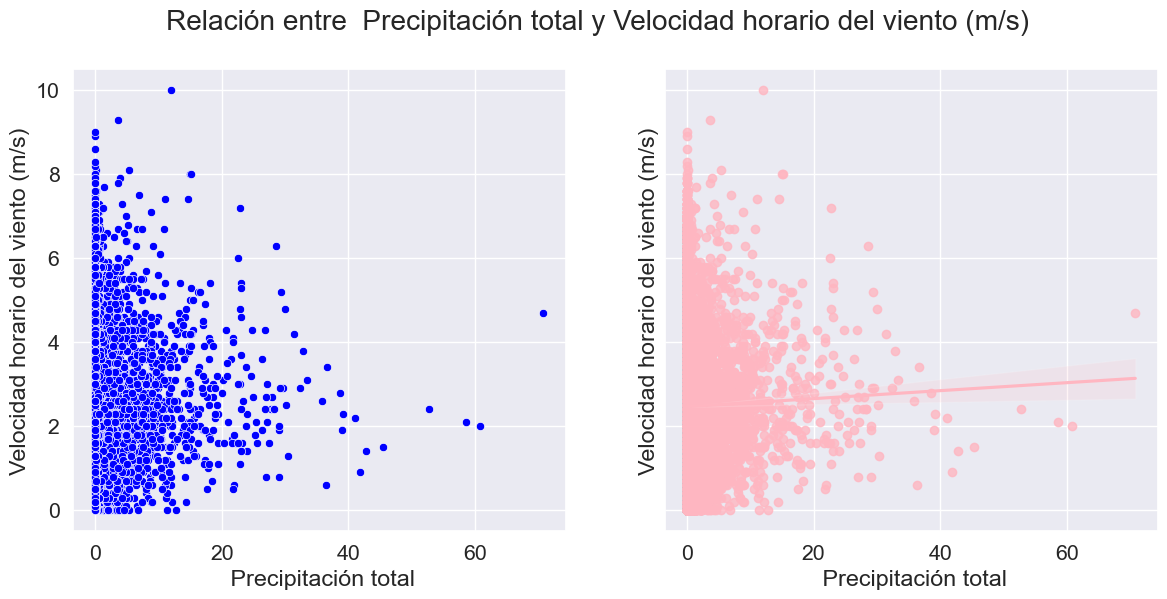

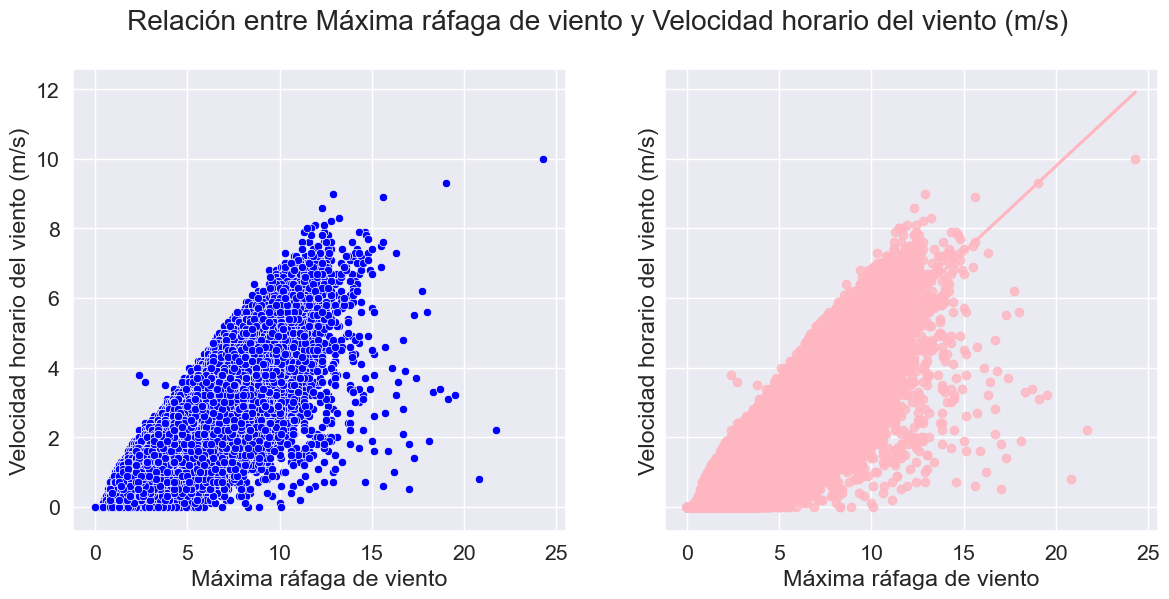

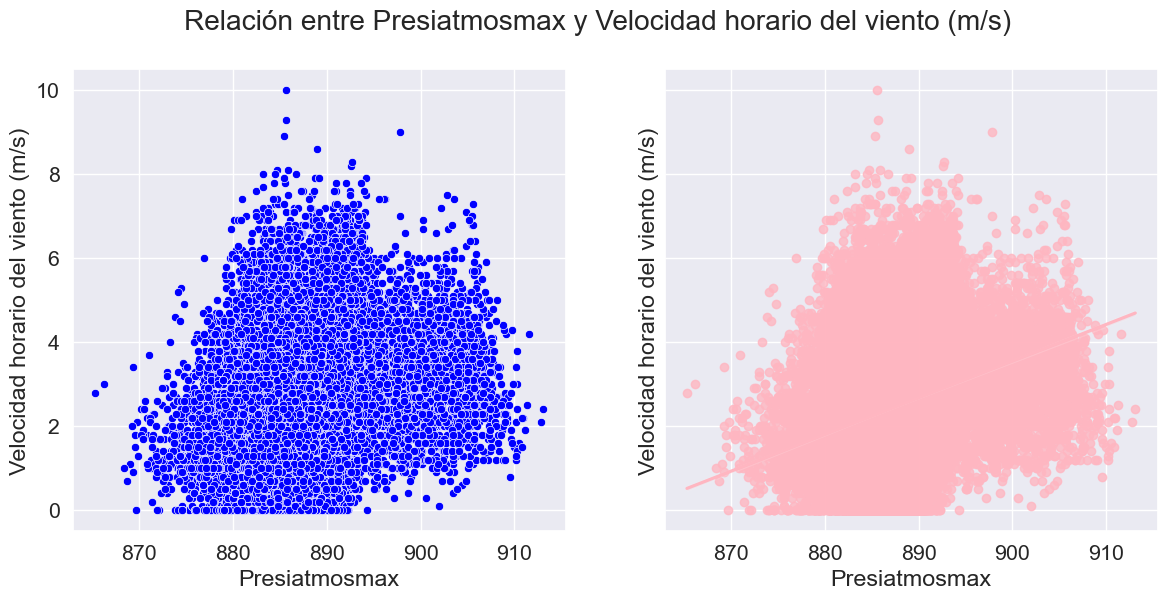

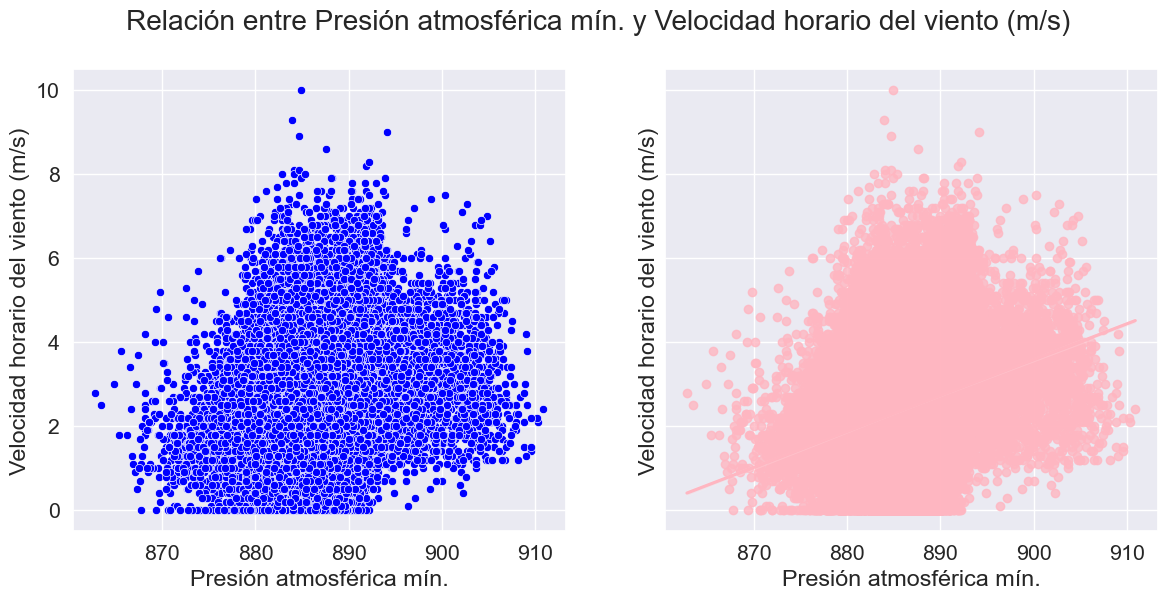

In [22]:
num_cols.remove('Velocidad horario del viento (m/s)')
for col in num_cols:
    scatter_regplot(wind, col, 'Velocidad horario del viento (m/s)')

Principalmente se encuentra una relacion relacion positiva entre los datos de maxima rafaga de viento y la velocidad horaria del viento, a mayor sea la rafaga maxima de viento, mayor sera la velocidad horaria de viento, esta relacion positiva se ve tambien, pero en menor medida al comparar los niveles de presion atmosferica con la velocidad del viento, es decir, a mayor presion atmosferica, mayor sera la velocidad del viento

Debido a esta alta correlacion que se logra observar en estos graficos, es importante realizar una eliminacion de varios de estos datos para evitar un alto porcentaje de overfitting pues muchos de estos resultados son similares entre ellos, para esto utilizamos variance inflation factor (VIF)

In [23]:
h=wind

In [24]:
wind=h

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
print(vif_data)

                               feature            VIF
0                                 HORA       5.756670
1         Dirección del viento horaria       1.764667
2   Velocidad horario del viento (m/s)      21.472214
3                 Humedad rel. máx aut    1041.288556
4                 Humedad rel. mín aut     873.592599
5                 Temperatura máx. AUT    2458.166449
6                 Temperatura mín. AUT    2040.043966
7                     Humedad relativa     605.398786
8                  Presión atmosférica  239729.935606
9                  Precipitación total       1.166410
10             Máxima ráfaga de viento      30.803252
11                       Presiatmosmax  948462.460794
12            Presión atmosférica mín.  969396.513182


In [26]:
wind = wind.drop('Presión atmosférica mín.', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                               feature            VIF
0                                 HORA       5.732878
1         Dirección del viento horaria       1.764655
2   Velocidad horario del viento (m/s)      21.472100
3                 Humedad rel. máx aut    1041.223639
4                 Humedad rel. mín aut     872.675000
5                 Temperatura máx. AUT    2433.989389
6                 Temperatura mín. AUT    2019.894779
7                     Humedad relativa     605.025952
8                  Presión atmosférica  221975.361285
9                  Precipitación total       1.165461
10             Máxima ráfaga de viento      30.799789
11                       Presiatmosmax  222530.244342


In [27]:
wind = wind.drop('Presión atmosférica', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                               feature          VIF
0                                 HORA     5.729686
1         Dirección del viento horaria     1.764260
2   Velocidad horario del viento (m/s)    21.462936
3                 Humedad rel. máx aut  1041.179234
4                 Humedad rel. mín aut   872.655012
5                 Temperatura máx. AUT  2433.413757
6                 Temperatura mín. AUT  2019.770603
7                     Humedad relativa   604.840542
8                  Precipitación total     1.164753
9              Máxima ráfaga de viento    30.780160
10                       Presiatmosmax   168.716547


In [28]:
wind = wind.drop('Temperatura máx. AUT', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                              feature         VIF
0                                HORA    5.692848
1        Dirección del viento horaria    1.752916
2  Velocidad horario del viento (m/s)   21.346132
3                Humedad rel. máx aut  483.338846
4                Humedad rel. mín aut  398.127100
5                Temperatura mín. AUT   74.975563
6                    Humedad relativa  600.072686
7                 Precipitación total    1.146077
8             Máxima ráfaga de viento   30.487909
9                       Presiatmosmax  144.087171


In [29]:
wind = wind.drop('Humedad rel. máx aut', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                              feature         VIF
0                                HORA    5.555548
1        Dirección del viento horaria    1.743150
2  Velocidad horario del viento (m/s)   21.344828
3                Humedad rel. mín aut  359.693193
4                Temperatura mín. AUT   74.478535
5                    Humedad relativa  403.370714
6                 Precipitación total    1.145611
7             Máxima ráfaga de viento   30.466511
8                       Presiatmosmax  139.778996


In [30]:
wind = wind.drop('Humedad relativa', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                              feature         VIF
0                                HORA    5.484705
1        Dirección del viento horaria    1.709306
2  Velocidad horario del viento (m/s)   20.806823
3                Humedad rel. mín aut   21.503967
4                Temperatura mín. AUT   73.257269
5                 Precipitación total    1.116221
6             Máxima ráfaga de viento   29.886266
7                       Presiatmosmax  133.061080


In [31]:
wind = wind.drop('Presiatmosmax', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                              feature        VIF
0                                HORA   5.468956
1        Dirección del viento horaria   1.502811
2  Velocidad horario del viento (m/s)  20.742039
3                Humedad rel. mín aut   6.401121
4                Temperatura mín. AUT  17.914017
5                 Precipitación total   1.116128
6             Máxima ráfaga de viento  29.881085


In [32]:
wind = wind.drop('Máxima ráfaga de viento', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                              feature        VIF
0                                HORA   5.335222
1        Dirección del viento horaria   1.484971
2  Velocidad horario del viento (m/s)   5.254167
3                Humedad rel. mín aut   6.373875
4                Temperatura mín. AUT  15.915692
5                 Precipitación total   1.042880


In [33]:
wind = wind.drop('Temperatura mín. AUT', axis=1)
X = wind
vif_data = pd.DataFrame()
vif_data["feature"] = wind.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  
print(vif_data)

                              feature       VIF
0                                HORA  3.303058
1        Dirección del viento horaria  1.455961
2  Velocidad horario del viento (m/s)  4.550451
3                Humedad rel. mín aut  3.050518
4                 Precipitación total  1.029911


## MODELOS

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
svm_modelR = SVC(kernel='linear', max_iter=50,probability=True, random_state=123)
xb_modelR = XGBClassifier(random_state=123)
knn_modelR = KNeighborsRegressor()
nb_modelR = GaussianNB()
mlp_classifierR = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=20,random_state=123)
lasso_classifierR = LogisticRegression(penalty='l1', solver='liblinear', random_state=123)

In [36]:
X = wind.drop(columns=['Velocidad horario del viento (m/s)'])
y = wind['Velocidad horario del viento (m/s)']  #

In [37]:
y_24 = y.shift(-24)
y_48 = y.shift(-48)
y_72 = y.shift(-72)
y_96 = y.shift(-96)
y_120 = y.shift(-120)

In [38]:
X = X[:-120] 
y = y[:-120]  
y_24 = y_24[:-120]
y_48 = y_48[:-120]
y_72 = y_72[:-120]
y_96 = y_96[:-120]
y_120 = y_120[:-120]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN


In [40]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.26522386525835
Root Mean Squared Error (RMSE): 1.124821703763912
R-squared (R²): 0.2632309495934181


RIDGE

In [41]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [42]:
y_pred = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calcula la raíz cuadrada del MSE
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.4678156658832027
Root Mean Squared Error (RMSE): 1.2115344262063719
R-squared (R²): 0.1452570695037838


LASSO

In [46]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

# Realiza predicciones
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.548858051929018
Root Mean Squared Error (RMSE): 1.244531257915613
R-squared (R²): 0.09806421814426025


XGBOOST

In [47]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Realiza predicciones
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.055014753804481
Root Mean Squared Error (RMSE): 1.0271391112232466
R-squared (R²): 0.3856405655399636


SVM

In [50]:
model = SVR(kernel='linear', max_iter=10)
model.fit(X_train, y_train)

# Realiza predicciones
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 557.2741237215978
Root Mean Squared Error (RMSE): 23.606654225484768
R-squared (R²): -323.51358073828584


MLP

In [51]:
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=20,random_state=123)
model.fit(X_train, y_train)

# Realiza predicciones
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.2841786683531768
Root Mean Squared Error (RMSE): 1.1332160731092622
R-squared (R²): 0.25219313038980407
